# **Delhivery casestudy - Feature Engineering**

**About Delhivery**

   Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

   The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.
   
   
**Problem Statement**

The company wants:

* To understand and process the data  (clean, sanitize and manipulate data) to get useful features out of raw fields.
* To make sense out of the raw data and  to help the data science team to build forecasting models on it.
* To ensure and widen the gap between the quality, efficiency, and profitability of the business versus their competitors.

**Column Profiling:**

* **data** - tells whether the data is testing or training data
* **trip_creation_time** – Timestamp of trip creation
* **route_schedule_uuid** – Unique Id for a particular route schedule
* **route_type** – Transportation type
    * **FTL – Full Truck Load** : FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
    * **Carting** : Handling system consisting of small vehicles (carts)
* **trip_uuid** - Unique ID given to a particular trip (A trip may include different source and destination centers)
* **source_center** - Source ID of trip origin
* **source_name** - Source Name of trip origin
* **destination_cente** – Destination ID
* **destination_name** – Destination Name
* **od_start_time** – Trip start time
* **od_end_time** – Trip end time
* **start_scan_to_end_scan** – Time taken to deliver from source to destination
* **is_cutoff** – Unknown field
* **cutoff_factor** – Unknown field
* **cutoff_timestamp** – Unknown field
* **actual_distance_to_destination** – Distance in Kms between source and destination warehouse
* **actual_time** – Actual time taken to complete the delivery (Cumulative)
* **osrm_time** – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* **osrm_distance** – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
factor – Unknown field
* **segment_actual_time** – This is a segment time. Time taken by the subset of the package delivery
* **segment_osrm_time** – This is the OSRM segment time. Time taken by the subset of the package delivery
* **segment_osrm_distance** – This is the OSRM distance. Distance covered by subset of the package delivery
* **segment_factor** – Unknown field

In [1]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv("delhivery_data.txt")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
# Examine shape of dataset
df.shape

(144867, 24)

The dataset has 144867 rows and 24 columns

In [4]:
# Examine the data types of values in dataset.
df.dtypes

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

Most of the features are object and float64 types. The time related features are of object type.

In [5]:
# To obtain detailed information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Observations :**

* The dataset has 144867 rows and 24 columns.
* There is missing values for source_name and destination_name in the dataset.We will drop the rows having missing values.
* Some time related features like trip_creation_time, od_start_time, od_end_time are provided in object datatype.We need to convert these columns into pandas datatime datatype.

In [6]:
# changing datatype of columns  
time = [ "trip_creation_time", "od_start_time", "od_end_time"]
for x in time:
    df[x] = df[x].astype("datetime64[ns]")

**Missing values Treatment**

In [7]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
    return missing_data
missing_check(df)

,Total,Percent
source_name,293,0.202254
destination_name,261,0.180165
data,0,0.000000
cutoff_factor,0,0.000000
segment_osrm_distance,0,0.000000
segment_osrm_time,0,0.000000
segment_actual_time,0,0.000000
factor,0,0.000000
osrm_distance,0,0.000000
osrm_time,0,0.000000


In [8]:
# Removing missing values from dataset
df = df.dropna(how='any') 
df = df.reset_index(drop=True)

In [9]:
# Dropping irrelevant features having unknown records
df=df.drop(['data','is_cutoff', 'cutoff_factor','route_schedule_uuid',
       'cutoff_timestamp','segment_factor', 'factor'],axis=1)

In [10]:
# Statistical analysis of numerical columns in the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,144316.0,963.697698,1038.082976,20.000000,161.000000,451.000000,1645.000000,7898.000000
actual_distance_to_destination,144316.0,234.708498,345.480571,9.000045,23.352027,66.135322,286.919294,1927.447705
actual_time,144316.0,417.996237,598.940065,9.000000,51.000000,132.000000,516.000000,4532.000000
osrm_time,144316.0,214.437055,308.448543,6.000000,27.000000,64.000000,259.000000,1686.000000
osrm_distance,144316.0,285.549785,421.717826,9.008200,29.896250,78.624400,346.305400,2326.199100
segment_actual_time,144316.0,36.175379,53.524298,-244.000000,20.000000,28.000000,40.000000,3051.000000
segment_osrm_time,144316.0,18.495697,14.774008,0.000000,11.000000,17.000000,22.000000,1611.000000
segment_osrm_distance,144316.0,22.818993,17.866367,0.000000,12.053975,23.508300,27.813325,2191.403700


**Observations :**

* There are outliers present in almost all features.
* The dataset has 144316 rows and 17 columns.
* There is much variation between the mean and median values for the features considered which gives an idea that the distribution could be skewed.

In [11]:
# Display the no. of unique values in each column
df.nunique()

trip_creation_time                 14787
route_type                             2
trip_uuid                          14787
source_center                       1496
source_name                         1496
destination_center                  1466
destination_name                    1466
od_start_time                      26223
od_end_time                        26223
start_scan_to_end_scan              1914
actual_distance_to_destination    143965
actual_time                         3182
osrm_time                           1531
osrm_distance                     137544
segment_actual_time                  746
segment_osrm_time                    214
segment_osrm_distance             113497
dtype: int64

## **Basic data cleaning and exploration**

### Subtrip level
> **Merge rows based on Trip_uuid, Source ID and Destination ID.**


In [12]:
df['TSD_ID'] = df['trip_uuid'] + df['source_center'] + df['destination_center']

sgmt_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for col in sgmt_cols:
    df[col + '_sum'] = df.groupby('TSD_ID')[col].cumsum()    
    
df[[col + '_sum' for col in sgmt_cols]].head(20)

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
5,15.0,12.1171,11.0
6,43.0,21.2890,17.0
7,64.0,35.8252,28.0
8,74.0,47.1900,38.0
9,100.0,53.2334,44.0


In [13]:
TSD_dict = {        
    'trip_creation_time': 'first',     
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',    
    'destination_center' : 'last',
    'destination_name' : 'last',    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    
    'start_scan_to_end_scan' : 'first',    
    'actual_distance_to_destination' : 'last',
    'osrm_distance' : 'last',
    'actual_time' : 'last',    
    'osrm_time' : 'last',
    
    
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last'   
    }

segment = df.groupby('TSD_ID').agg(TSD_dict).reset_index()
segment = segment.sort_values(by=['TSD_ID','od_end_time'], ascending=True).reset_index()
segment = segment.drop(["index"],axis=1)
segment.head()

,TSD_ID,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,446.5496,732.0,329.0,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,544.8027,830.0,388.0,820.0,649.8528,474.0
2,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,28.1994,47.0,26.0,46.0,28.1995,26.0
3,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,56.9116,96.0,42.0,95.0,55.9899,39.0
4,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,281.2109,611.0,212.0,608.0,317.7408,231.0


>  **Segment dataframe is obtained by merging Trip_uuid, Source ID and Destination ID which condensed checkpoint level data.**

In [14]:
segment.shape

(26222, 18)

The dataset has 26222 rows and 18 columns.

In [15]:
segment[segment['trip_uuid'] == 'trip-153671041653548748']

,TSD_ID,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,446.5496,732.0,329.0,728.0,670.6205,534.0
1,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,544.8027,830.0,388.0,820.0,649.8528,474.0


In [16]:
segment.describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,26222.0,298.553390,441.116816,20.000000,90.000000,152.000000,307.000000,7898.000000
actual_distance_to_destination,26222.0,92.533054,209.952355,9.001351,21.654149,35.044329,65.557393,1927.447705
osrm_distance,26222.0,114.975332,254.426468,9.072900,27.719150,43.543550,85.443950,2326.199100
actual_time,26222.0,200.926588,385.730908,9.000000,51.000000,84.000000,167.000000,4532.000000
osrm_time,26222.0,90.785333,185.554359,6.000000,25.000000,39.000000,72.000000,1686.000000
segment_actual_time_sum,26222.0,199.095645,382.150687,9.000000,50.000000,83.000000,166.000000,4504.000000
segment_osrm_distance_sum,26222.0,125.587130,286.670106,9.072900,28.429100,45.797650,91.023575,2640.924700
segment_osrm_time_sum,26222.0,101.793341,216.202739,6.000000,25.000000,42.000000,79.000000,1938.000000


**Observations :**

In [17]:
segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   TSD_ID                          26222 non-null  object        
 1   trip_creation_time              26222 non-null  datetime64[ns]
 2   route_type                      26222 non-null  object        
 3   trip_uuid                       26222 non-null  object        
 4   source_center                   26222 non-null  object        
 5   source_name                     26222 non-null  object        
 6   destination_center              26222 non-null  object        
 7   destination_name                26222 non-null  object        
 8   od_start_time                   26222 non-null  datetime64[ns]
 9   od_end_time                     26222 non-null  datetime64[ns]
 10  start_scan_to_end_scan          26222 non-null  float64       
 11  ac

**Total trip duration**

In [18]:
segment['od_timediff_in_hours'] = ((segment['od_end_time'] - segment['od_start_time']).dt.total_seconds() / (60)).round(2)
segment['od_timediff_in_hours']

0        1260.60
1         999.51
2          58.83
3         122.78
4         834.64
          ...   
26217      62.12
26218      91.09
26219      44.17
26220     287.47
26221      66.93
Name: od_timediff_in_hours, Length: 26222, dtype: float64

In [19]:
segment[["start_scan_to_end_scan","od_timediff_in_hours"]].head()

,start_scan_to_end_scan,od_timediff_in_hours
0,1260.0,1260.60
1,999.0,999.51
2,58.0,58.83
3,122.0,122.78
4,834.0,834.64


**Observations :**
* The time taken between od_start_time and od_end_time ie, od_timediff_in_hours is nearly **equal** with start_scan_to_end_scan.

### Trip level 
> **Merge rows based on Trip_uuid**

In [20]:
TripID_dict = {    
    'trip_creation_time': 'first',
     'route_type' : 'first',
    'trip_uuid' : 'first',    
    'source_center' : 'first',
    'source_name' : 'first',    
    'destination_center' : 'last',
    'destination_name' : 'last',    
    'start_scan_to_end_scan' : 'sum',    
    'od_timediff_in_hours' : 'sum',    
    'actual_distance_to_destination' : 'sum',
    'osrm_distance' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    
    'segment_osrm_distance_sum' : 'sum',   
    'segment_actual_time_sum' : 'sum',    
    'segment_osrm_time_sum' : 'sum'    
    }

trip = segment.groupby('trip_uuid').agg(TripID_dict).reset_index(drop = True)
trip.head(10)

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_timediff_in_hours,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_osrm_distance_sum,segment_actual_time_sum,segment_osrm_time_sum
0,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.11,824.732854,991.3523,1562.0,717.0,1320.4733,1548.0,1008.0
1,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.61,73.186911,85.1110,143.0,68.0,84.1894,141.0,65.0
2,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.36,1927.404273,2354.0665,3347.0,1740.0,2545.2678,3308.0,1941.0
3,2018-09-12 00:01:00.113710,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.49,17.175274,19.6800,59.0,15.0,19.8766,59.0,16.0
4,2018-09-12 00:02:09.740725,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.34,127.448500,146.7918,341.0,117.0,146.7919,340.0,115.0
5,2018-09-12 00:02:34.161600,Carting,trip-153671055416136166,IND600056AAA,Chennai_Poonamallee (Tamil Nadu),IND600056AAA,Chennai_Poonamallee (Tamil Nadu),189.0,190.49,24.597048,28.0647,61.0,23.0,28.0647,60.0,23.0
6,2018-09-12 00:04:22.011653,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),98.0,98.01,9.100510,12.0184,24.0,13.0,12.0184,24.0,13.0
7,2018-09-12 00:04:28.263977,Carting,trip-153671066826362165,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),146.0,146.84,22.424210,28.9203,64.0,34.0,28.9203,64.0,34.0
8,2018-09-12 00:05:40.333071,Carting,trip-153671074033284934,IND395009AAA,Surat_Central_D_12 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),280.0,280.84,25.454848,30.9359,161.0,29.0,30.9358,161.0,29.0
9,2018-09-12 00:06:39.565253,Carting,trip-153671079956500691,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),49.0,49.33,9.872146,9.9566,23.0,8.0,16.0860,23.0,14.0


**Observations :** Each row corresponds to delivery details of a single order.

> **Trip dataframe is obtained by merging segment dataset wrt Trip_uuid based on aggregation**

In [21]:
trip.shape

(14787, 16)

The trip dataset has 14787 rows and 16 columns.

In [22]:
trip[trip['trip_uuid'] == 'trip-153671042288605164']

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_timediff_in_hours,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_osrm_distance_sum,segment_actual_time_sum,segment_osrm_time_sum
1,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.61,73.186911,85.111,143.0,68.0,84.1894,141.0,65.0


## **Feature Creation for Data Analysis**

> **Using source name, destination name and trip creation time**

**>** Here we split and extract features for each source and destination.

In [23]:
trip['source_name'] = trip['source_name'].str.lower()
trip['destination_name'] = trip['destination_name'].str.lower() 

In [24]:
def state(x):
    
    state = x.split('(')[1]    
    return state[:-1] # removing ")"

def city(x):
    
    city = x.split(' (')[0] # removing state    
    city = city.split('_')[0]
    
    # Edge cases
    
    if city == 'pnq vadgaon sheri dpc': return 'vadgaonsheri'
    
    # ['PNQ Pashan DPC', 'Bhopal MP Nagar', 'HBR Layout PC', 
    #  'PNQ Rahatani DPC', 'Pune Balaji Nagar', 'Mumbai Antop Hill']
    
    if city in ['pnq pashan dpc','pnq rahatani dpc', 'pune balaji nagar']: return 'pune'    
    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'mumbai antop hill' : return 'mumbai'    
    
    return city

def city_place(x):
    
    x = x.split(' (')[0] # removing state    
    len_ = len(x.split('_'))
    
    if len_ >= 3:
        return x.split('_')[1]    
    
    # For small cities city and place name are same
    if len_ == 2:
        return x.split('_')[0]
    
    
    # Edge cases or imporper name convention     
    return x.split(' ')[0]


def placecode(x):
     
    x = x.split(' (')[0] # removing state 
    
    if len(x.split('_')) >= 3 :
        return x.split('_')[-1]
    
    return 'none'


In [25]:
# Split and extract features out of source
trip['source_state'] = trip['source_name'].apply(lambda x: state(x)) 
trip['source_city']  = trip['source_name'].apply(lambda x: city(x)) 
trip['source_place'] = trip['source_name'].apply(lambda x: city_place(x)) 
trip['source_code']  = trip['source_name'].apply(lambda x: placecode(x)) 

trip[['source_state', 'source_city', 'source_place', 'source_code']].sample(10)

,source_state,source_city,source_place,source_code
2273,tamil nadu,dindigul,central,1
4743,tamil nadu,chennai,chennai,none
12650,karnataka,bangalore,nelmngla,h
4827,andhra pradesh,anantapur,kamastrt,i
2798,andhra pradesh,kurnool,abbasngr,i
3117,haryana,gurgaon,bilaspur,hb
2956,rajasthan,jaipur,jaipur,none
7137,haryana,fbd,balabhgarh,dpc
1875,karnataka,bangalore,nelmngla,h
12088,maharashtra,vadgaonsheri,pnq,none


In [26]:
# # Split and extract features out of destination
trip['dest_state'] = trip['destination_name'].apply(lambda x: state(x)) 
trip['dest_city']  = trip['destination_name'].apply(lambda x: city(x)) 
trip['dest_place'] = trip['destination_name'].apply(lambda x: city_place(x)) 
trip['dest_code']  = trip['destination_name'].apply(lambda x: placecode(x)) 

trip[['dest_state', 'dest_city', 'dest_place', 'dest_code']].sample(10)

,dest_state,dest_city,dest_place,dest_code
5603,haryana,faridabad,mthurard,l
3854,karnataka,bangalore,nelmngla,h
1829,gujarat,vapi,indestat,i
3007,gujarat,anand,vaghasi,ip
7642,maharashtra,bhiwandi,mankoli,hb
8192,telangana,hyderabad,shamshbd,h
12831,haryana,gurgaon,bilaspur,hb
4752,bihar,siwan,hnmntngr,d
3925,gujarat,vapi,indestat,i
3325,punjab,muktsar,muktsar,none


In [27]:
# Extract features like month, year and day  from trip creation time 
trip['trip_year'] = trip['trip_creation_time'].dt.year
trip['trip_month'] = trip['trip_creation_time'].dt.month
trip['trip_hour'] = trip['trip_creation_time'].dt.hour
trip['trip_day'] = trip['trip_creation_time'].dt.day
trip['trip_week'] = trip['trip_creation_time'].dt.isocalendar().week
trip['trip_dayofweek'] = trip['trip_creation_time'].dt.dayofweek

trip[['trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week', 'trip_dayofweek']].sample(10)

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
6705,2018,9,6,21,38,4
9382,2018,9,3,25,39,1
3471,2018,9,20,16,37,6
6442,2018,9,22,20,38,3
1213,2018,9,18,13,37,3
12073,2018,9,5,29,39,5
12161,2018,9,9,29,39,5
9341,2018,9,1,25,39,1
14308,2018,10,4,3,40,2
1014,2018,9,8,13,37,3


In [28]:
trip.head()

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_timediff_in_hours,actual_distance_to_destination,...,dest_state,dest_city,dest_place,dest_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,2260.11,824.732854,...,uttar pradesh,kanpur,central,6,2018,9,0,12,37,2
1,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.61,73.186911,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
2,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,3934.36,1927.404273,...,haryana,gurgaon,bilaspur,hb,2018,9,0,12,37,2
3,2018-09-12 00:01:00.113710,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,100.49,17.175274,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
4,2018-09-12 00:02:09.740725,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,718.34,127.448500,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2


In [29]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_creation_time              14787 non-null  datetime64[ns]
 1   route_type                      14787 non-null  object        
 2   trip_uuid                       14787 non-null  object        
 3   source_center                   14787 non-null  object        
 4   source_name                     14787 non-null  object        
 5   destination_center              14787 non-null  object        
 6   destination_name                14787 non-null  object        
 7   start_scan_to_end_scan          14787 non-null  float64       
 8   od_timediff_in_hours            14787 non-null  float64       
 9   actual_distance_to_destination  14787 non-null  float64       
 10  osrm_distance                   14787 non-null  float64       
 11  ac

**Observations :**
* The dataset has 14787 rows for each columns.
* There is no missing values in the data.
* Most of the features are of object and int64/float64 datatype.Trip creation time is a datetime column.

In [30]:
trip.columns

Index(['trip_creation_time', 'route_type', 'trip_uuid', 'source_center',
       'source_name', 'destination_center', 'destination_name',
       'start_scan_to_end_scan', 'od_timediff_in_hours',
       'actual_distance_to_destination', 'osrm_distance', 'actual_time',
       'osrm_time', 'segment_osrm_distance_sum', 'segment_actual_time_sum',
       'segment_osrm_time_sum', 'source_state', 'source_city', 'source_place',
       'source_code', 'dest_state', 'dest_city', 'dest_place', 'dest_code',
       'trip_year', 'trip_month', 'trip_hour', 'trip_day', 'trip_week',
       'trip_dayofweek'],
      dtype='object')

# **Exploratory Data Analysis**

## **UNIVARIATE ANALYSIS**

> **Trip_uuid** is the target variable for our data analysis.

array([[<AxesSubplot:title={'center':'trip_creation_time'}>,
        <AxesSubplot:title={'center':'start_scan_to_end_scan'}>,
        <AxesSubplot:title={'center':'od_timediff_in_hours'}>,
        <AxesSubplot:title={'center':'actual_distance_to_destination'}>],
       [<AxesSubplot:title={'center':'osrm_distance'}>,
        <AxesSubplot:title={'center':'actual_time'}>,
        <AxesSubplot:title={'center':'osrm_time'}>,
        <AxesSubplot:title={'center':'segment_osrm_distance_sum'}>],
       [<AxesSubplot:title={'center':'segment_actual_time_sum'}>,
        <AxesSubplot:title={'center':'segment_osrm_time_sum'}>,
        <AxesSubplot:title={'center':'trip_year'}>,
        <AxesSubplot:title={'center':'trip_month'}>],
       [<AxesSubplot:title={'center':'trip_hour'}>,
        <AxesSubplot:title={'center':'trip_day'}>,
        <AxesSubplot:title={'center':'trip_week'}>,
        <AxesSubplot:title={'center':'trip_dayofweek'}>]], dtype=object)

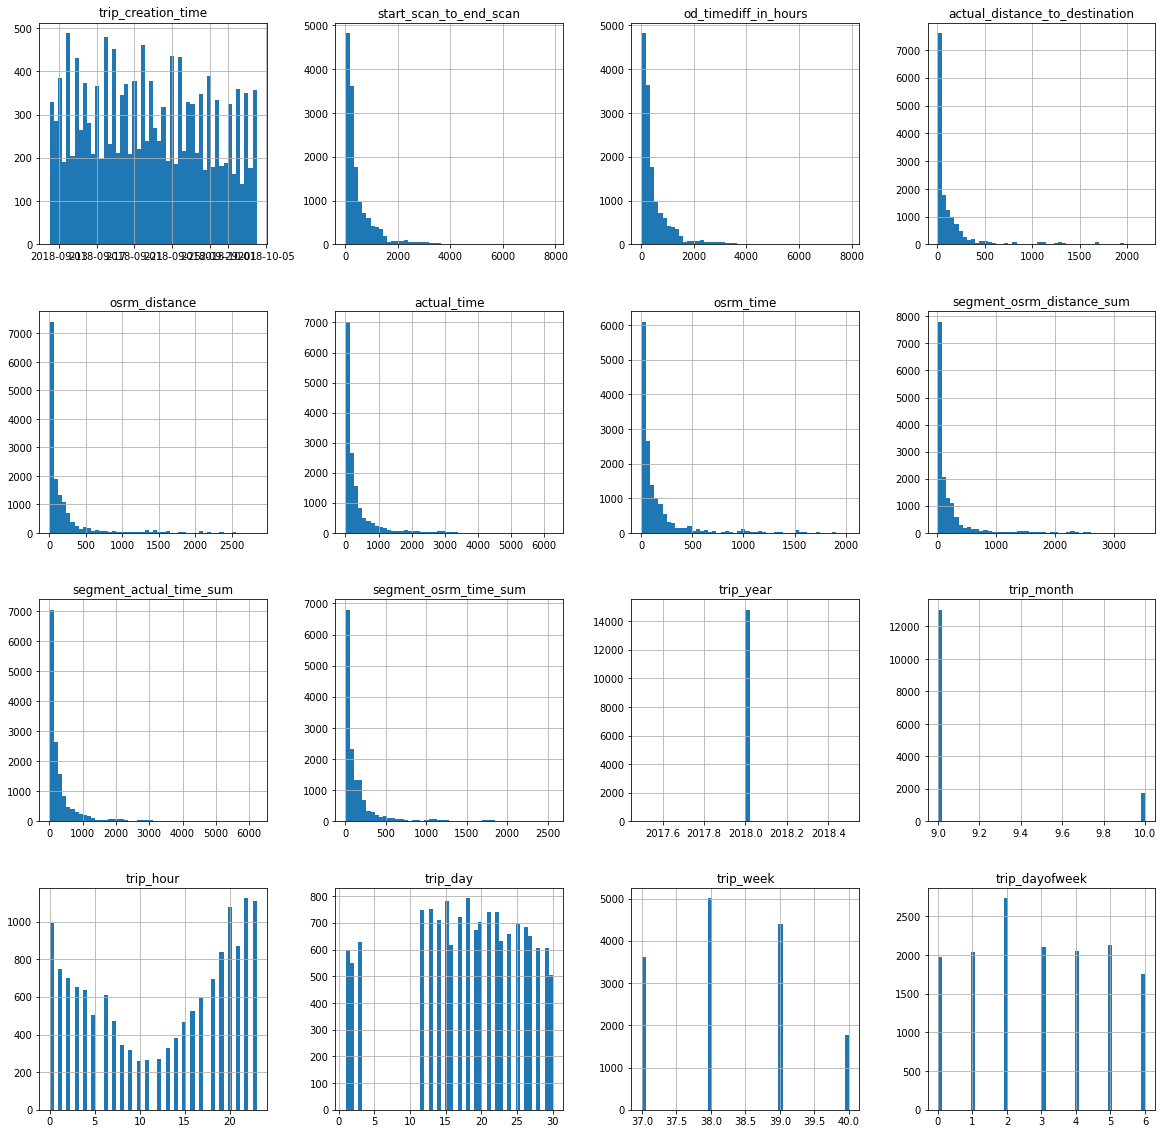

In [31]:
# The following code plots a histrogram.
trip.hist(figsize=(20,20),bins = 50)

**Observations :**
* Majority of the distributions of numerical columns are non-Gaussian.From histograms we infer that the mean and median for these variables could have significant variations in their values.

**FOR CATEGORICAL FEATURES**

In [32]:
# Checking value counts of columns
col_names = ['route_type','source_state','dest_state',"trip_year","trip_month",'trip_day']
for x in col_names : 
    print('{} :{} ' . format(x.upper(),trip[x].unique()))
    print()

ROUTE_TYPE :['FTL' 'Carting'] 

SOURCE_STATE :['uttar pradesh' 'karnataka' 'haryana' 'maharashtra' 'tamil nadu'
 'gujarat' 'delhi' 'telangana' 'rajasthan' 'assam' 'madhya pradesh'
 'west bengal' 'andhra pradesh' 'punjab' 'chandigarh' 'goa' 'jharkhand'
 'pondicherry' 'orissa' 'uttarakhand' 'himachal pradesh' 'kerala'
 'arunachal pradesh' 'bihar' 'chhattisgarh' 'dadra and nagar haveli'
 'jammu & kashmir' 'mizoram' 'nagaland'] 

DEST_STATE :['uttar pradesh' 'karnataka' 'haryana' 'maharashtra' 'tamil nadu'
 'gujarat' 'delhi' 'telangana' 'rajasthan' 'madhya pradesh' 'assam'
 'west bengal' 'andhra pradesh' 'punjab' 'chandigarh'
 'dadra and nagar haveli' 'orissa' 'bihar' 'jharkhand' 'goa' 'uttarakhand'
 'himachal pradesh' 'kerala' 'arunachal pradesh' 'mizoram' 'chhattisgarh'
 'jammu & kashmir' 'nagaland' 'meghalaya' 'tripura' 'daman & diu'] 

TRIP_YEAR :[2018] 

TRIP_MONTH :[ 9 10] 

TRIP_DAY :[12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30  1  2  3] 



**Observations :**
* For the dataset we considered September and October months of 2018.
* The route types of package delivery are Full Truck Load(FTL) and Carting.
* The logistics network is widely spread across almost all states of India.

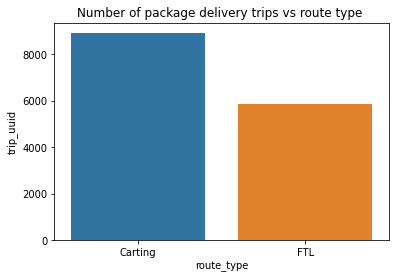

In [33]:
# No.of package delivery trips made on route type basis 
route_data = trip.groupby(['route_type'])['trip_uuid'].count()
route_data = route_data.reset_index()

sns.barplot(x='route_type',y='trip_uuid',data=route_data)
plt.title('Number of package delivery trips vs route type ')

plt.show()

**Observations :** More packages delivery trips are made by means of carting compared to full truck load(FTL).FTL shipments get to the destination sooner,
as the truck is making no other pickups or drop-offs along the way.


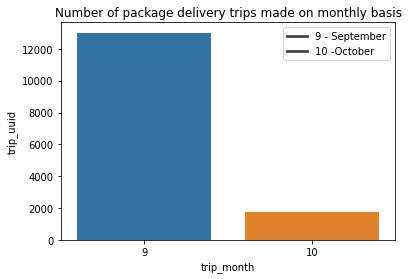

In [34]:
# No.of package delivery trips made on monthly basis 
month_data = trip.groupby(['trip_month'])['trip_uuid'].count()
month_data = month_data.reset_index()
label = ["9 - September","10 -October"]
sns.barplot(x='trip_month',y='trip_uuid',data=month_data)
plt.title('Number of package delivery trips made on monthly basis')
plt.legend(label)
plt.show()

**Observations :** More package delivery trips are made in September,2018.

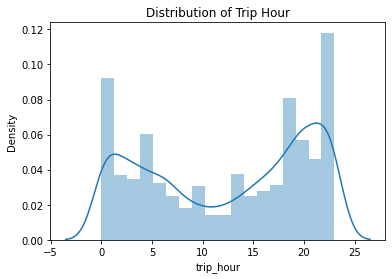

In [35]:
# No.of package delivery trips made on hourly basis of a day
sns.distplot(trip["trip_hour"])
plt.title("Distribution of Trip Hour")
plt.show()

We observe a kind of bimodal distribution with minimum trips occuring during the day hours
(8 AM to 1 PM) and maximum occuring during late night or early morning hours (8 PM to 2 AM).


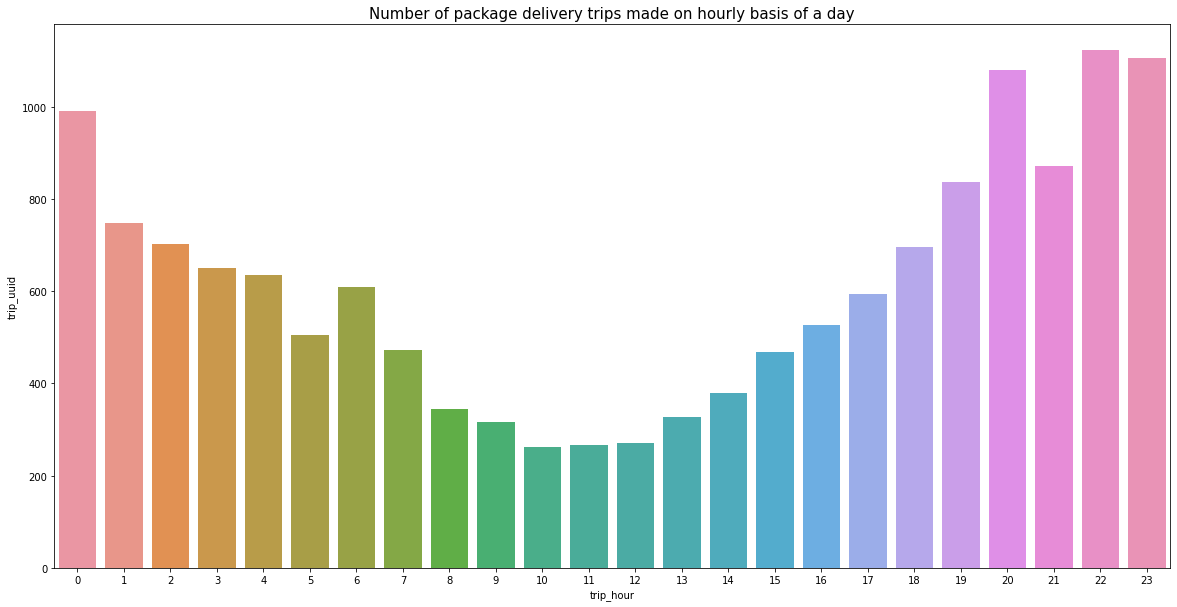

In [36]:
# No.of package delivery trips made on hourly basis of a day
hour_data = trip.groupby(['trip_hour'])['trip_uuid'].count()
hour_data = hour_data.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='trip_hour',y='trip_uuid',data=hour_data)
plt.title('Number of package delivery trips made on hourly basis of a day',fontsize = 15)

plt.show()

**Observations :** More delivery trips are made during night hours compared to day time.Possible reason could be to avoid usual traffic in daytime.

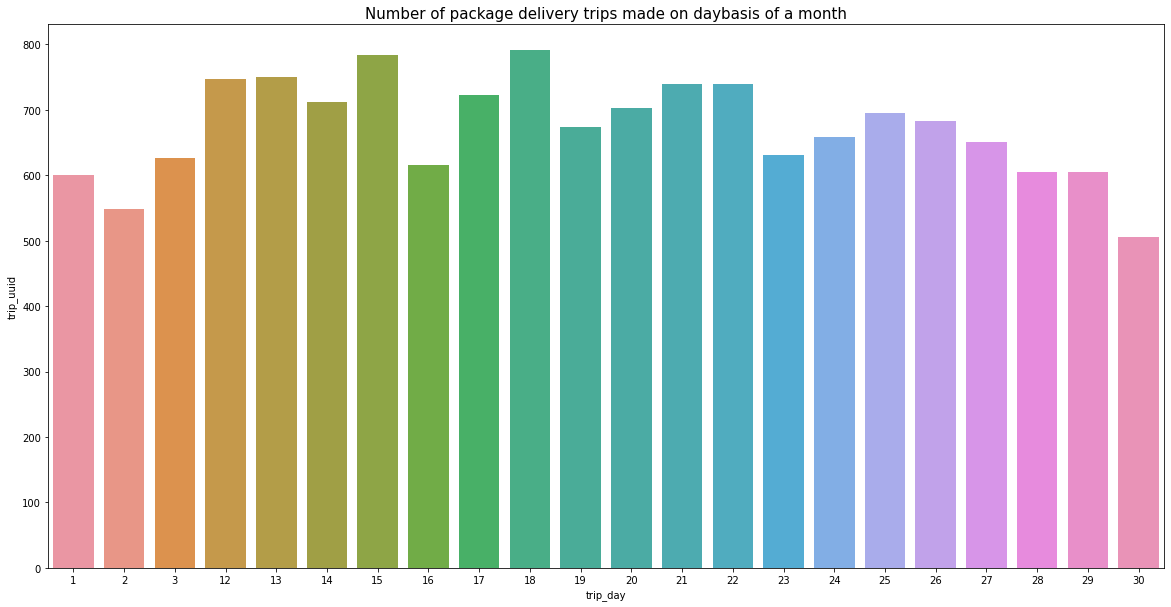

In [37]:
# No.of package delivery trips made on days of a month
day_data = trip.groupby(['trip_day'])['trip_uuid'].count()
day_data = day_data.reset_index()
plt.figure(figsize=(20,10))
sns.barplot(x='trip_day',y='trip_uuid',data=day_data)
plt.title('Number of package delivery trips made on daybasis of a month',fontsize = 15)

plt.show()

**Observations :** More package delivery trips are made in the mid of September/October,2018.

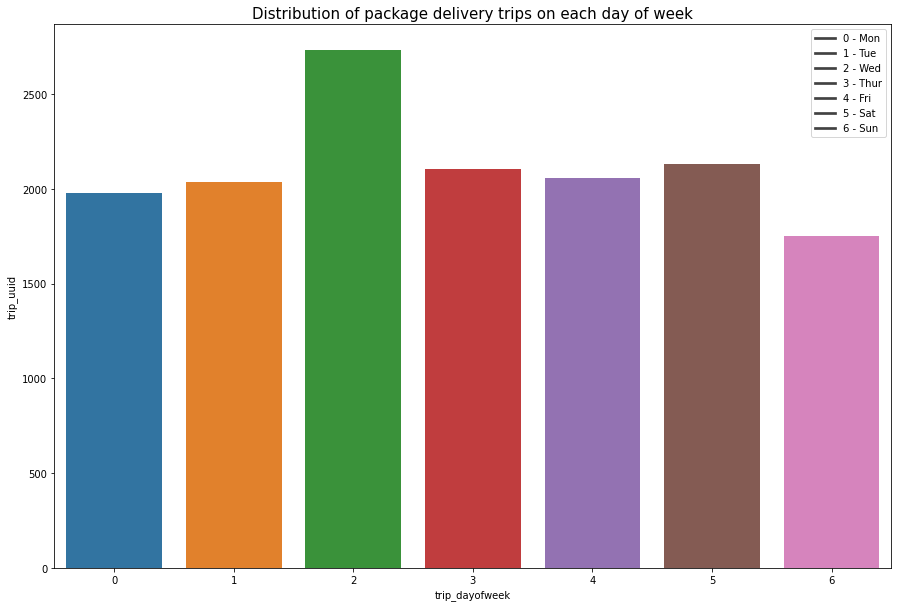

In [38]:
# No.of package delivery trips made on weekly basis
dayofweek_data = trip.groupby(['trip_dayofweek'])['trip_uuid'].count()
dayofweek_data = dayofweek_data.reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='trip_dayofweek',y='trip_uuid',data=dayofweek_data)
plt.title('Distribution of package delivery trips on each day of week',fontsize = 15)
label =["0 - Mon","1 - Tue","2 - Wed","3 - Thur","4 - Fri","5 - Sat","6 - Sun"]
plt.legend(label)

plt.show()

**Observations :** More package trips are made on Wednesday of every week compared to other days and less trips on Sunday .

trip_week       37      38      39      40
trip_month                                
9           3608.0  5001.0  4402.0     0.0
10             0.0     0.0     0.0  1776.0
----------------------------------------------------------------------------------------------------


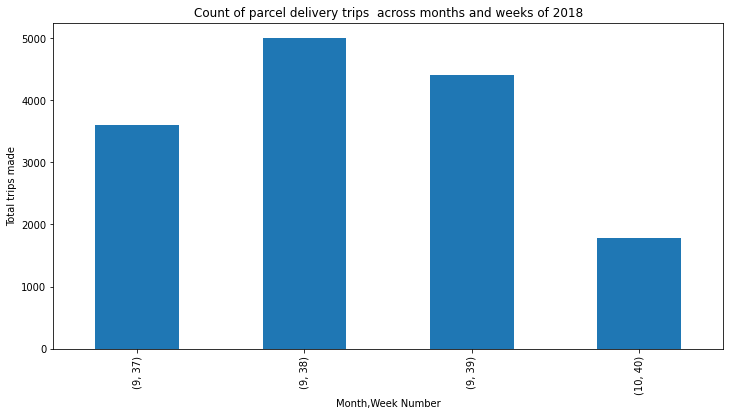

In [39]:
mon_week_data = trip.groupby(['trip_month','trip_week'])['trip_uuid'].count()
mon_week_data = pd.DataFrame(mon_week_data)
mon_week_data.reset_index(inplace = True)
myy = mon_week_data.pivot('trip_month','trip_week','trip_uuid').fillna(0)
print(round(myy,0))
print("-"*100)
fig = plt.figure(figsize = (12,6))
trip.groupby(['trip_month','trip_week'])['trip_uuid'].count().plot(kind="bar")
plt.title('Count of parcel delivery trips  across months and weeks of 2018')
plt.xlabel('Month,Week Number')
plt.ylabel('Total trips made')
plt.show()

**Observations :** The number of delivery trips made are more in the weeks of 38 and 39 in September month compared to October.

source_state    dest_state    
maharashtra     maharashtra       2453
karnataka       karnataka         2057
tamil nadu      tamil nadu        1021
haryana         haryana            945
telangana       telangana          689
gujarat         gujarat            629
west bengal     west bengal        615
uttar pradesh   uttar pradesh      592
rajasthan       rajasthan          453
andhra pradesh  andhra pradesh     414
Name: trip_uuid, dtype: int64
--------------------------------------------------------------------------------


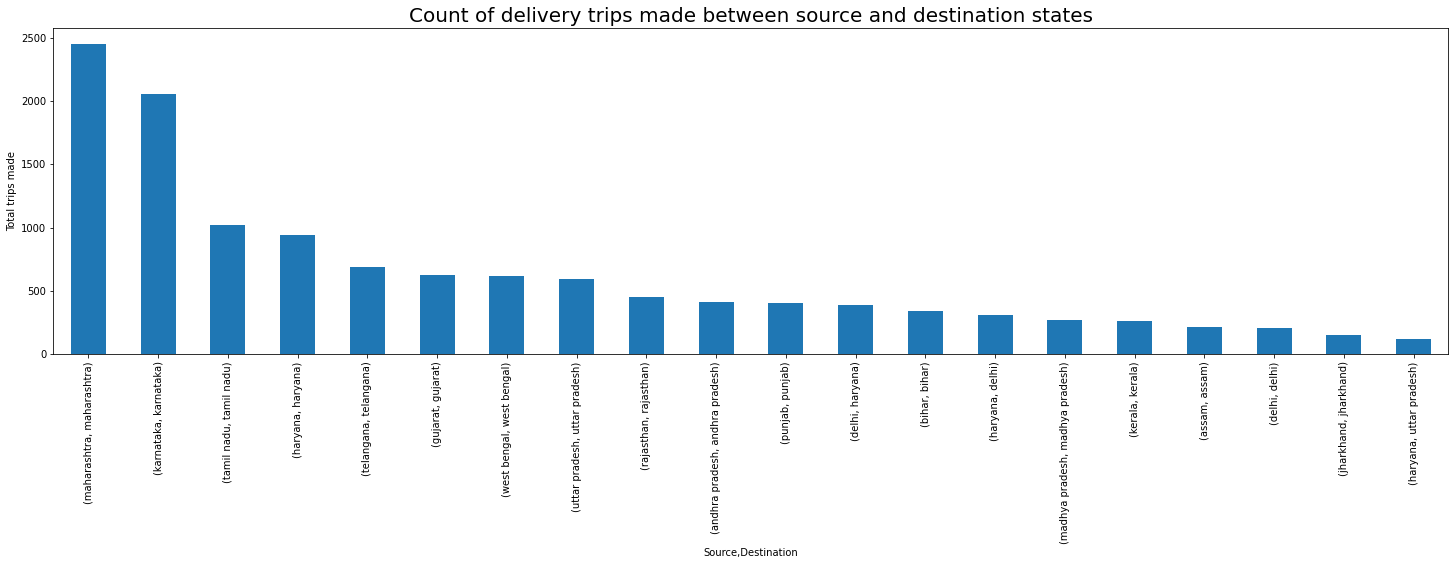

In [40]:
# To check for busiest statewise corridors
print(trip.groupby(['source_state','dest_state'])['trip_uuid'].count().sort_values(ascending = False).head(10))
print("--"*40)
fig = plt.figure(figsize = (25,6))
trip.groupby(['source_state','dest_state'])['trip_uuid'].count().sort_values(ascending = False).head(20).plot(kind="bar")
plt.title('Count of delivery trips made between source and destination states',fontsize =20)
plt.xlabel('Source,Destination')
plt.ylabel('Total trips made')
plt.show()

**Observations :** More number of delivery trips are made within Maharashtra followed by Karnataka and Tamil Nadu.

source_city  dest_city
bengaluru    bengaluru    718
bangalore    bengaluru    477
hyderabad    hyderabad    355
mumbai       mumbai       354
bengaluru    bangalore    344
bhiwandi     mumbai       332
pune         pune         241
gurgaon      delhi        241
mumbai hub   mumbai       227
chennai      chennai      223
Name: trip_uuid, dtype: int64
--------------------------------------------------------------------------------


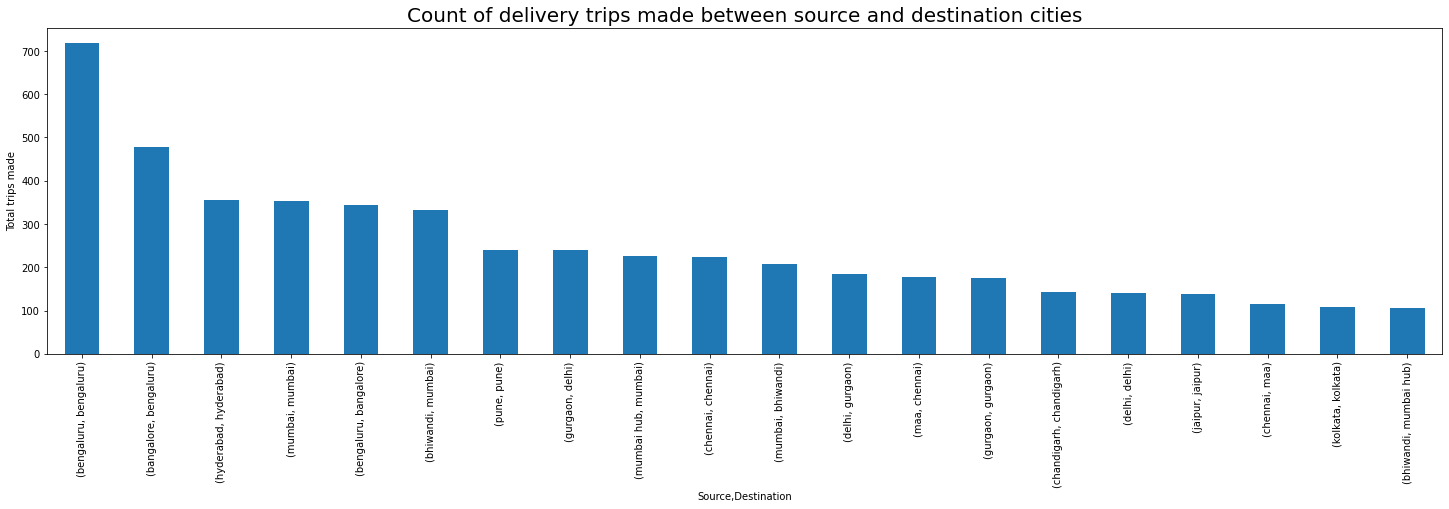

In [41]:
print(trip.groupby(['source_city','dest_city'])['trip_uuid'].count().sort_values(ascending = False).head(10))
print("--"*40)
fig = plt.figure(figsize = (25,6))
trip.groupby(['source_city','dest_city'])['trip_uuid'].count().sort_values(ascending = False).head(20).plot(kind="bar")
plt.title('Count of delivery trips made between source and destination cities',fontsize =20)
plt.xlabel('Source,Destination')
plt.ylabel('Total trips made')
plt.show()

**Observations :** More number of delivery trips are made within Bangalore followed by Mumbai and Hyderabad.

**FOR CONTINUOUS FEATURES**

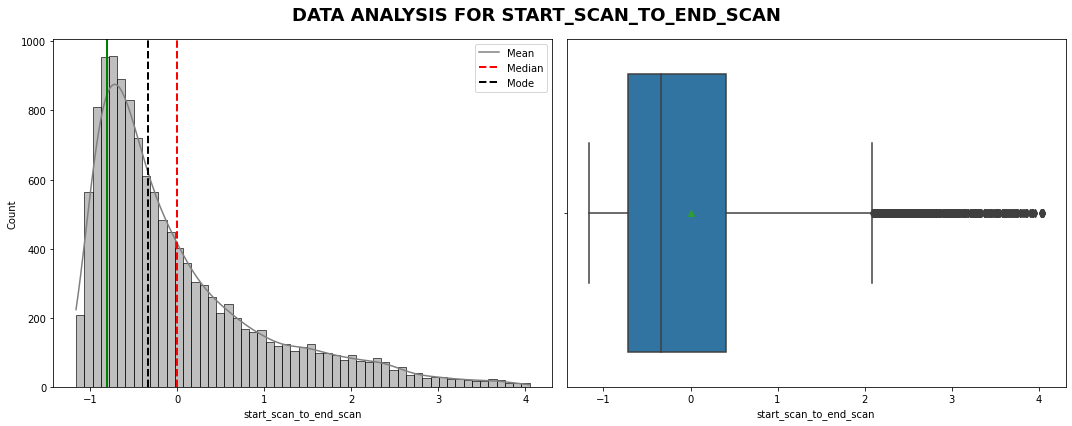

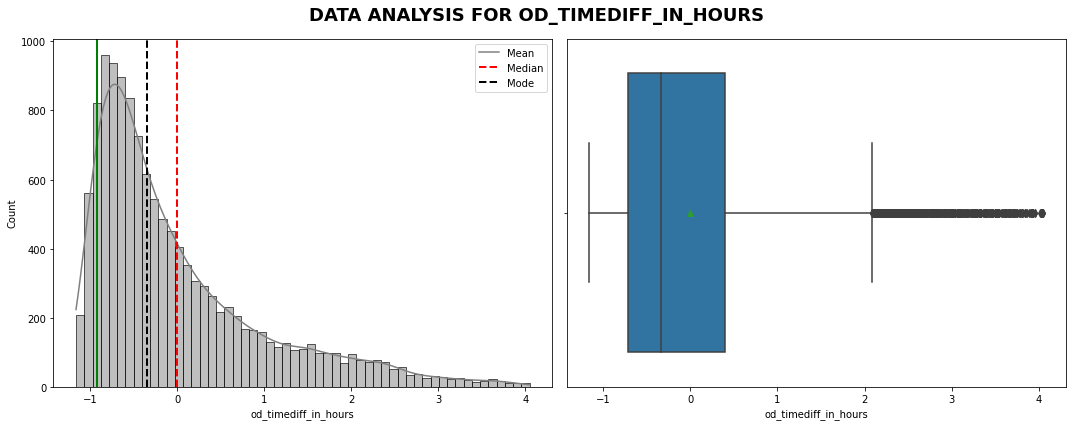

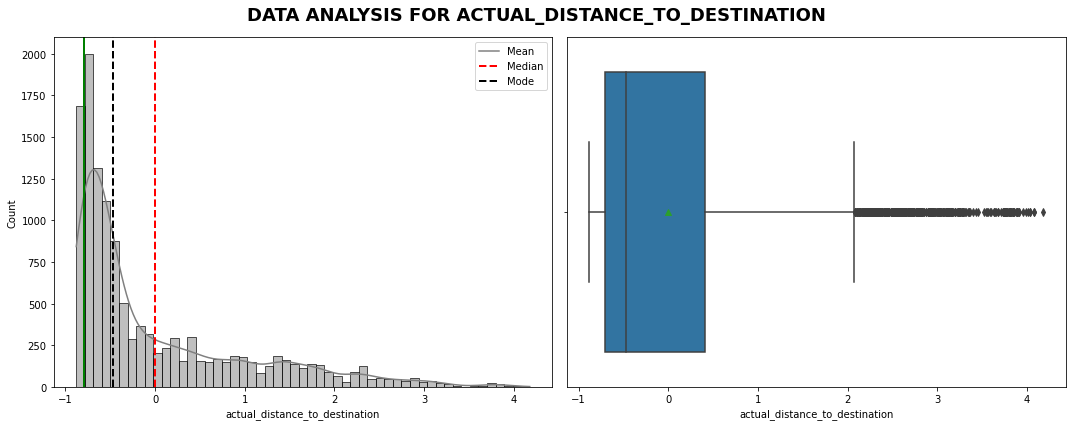

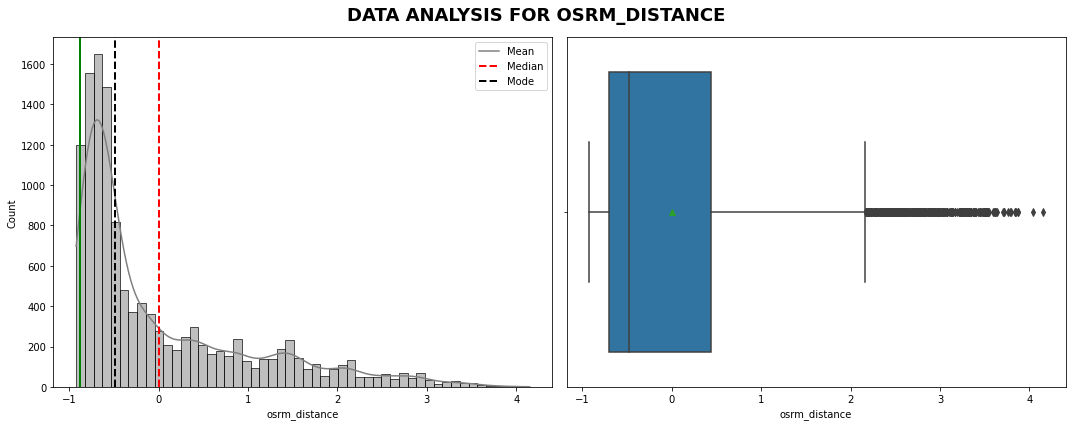

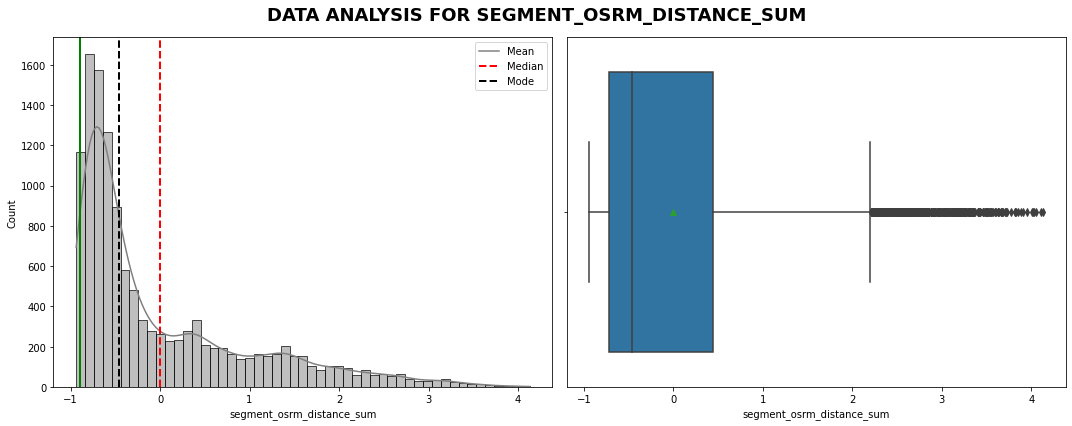

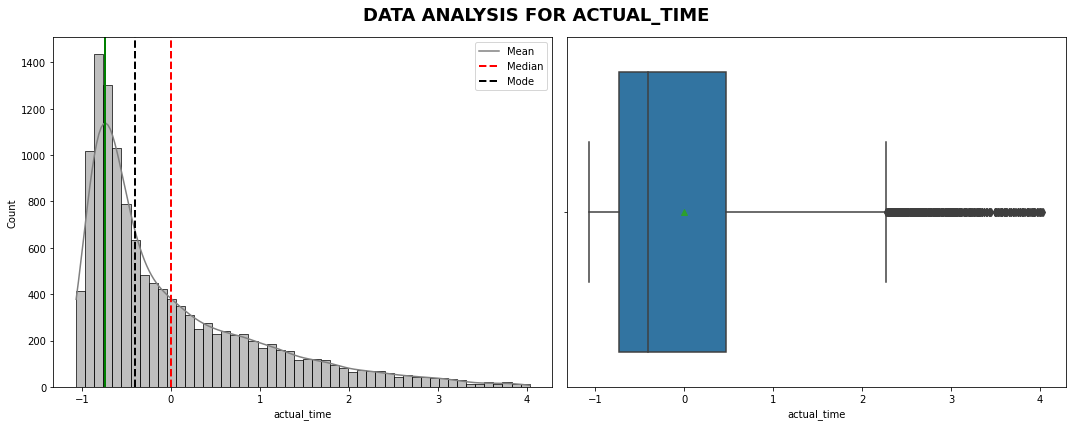

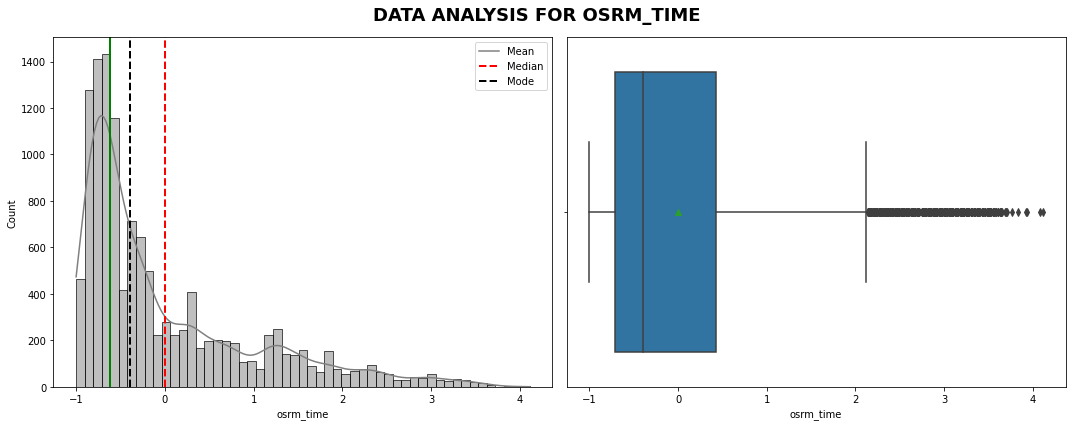

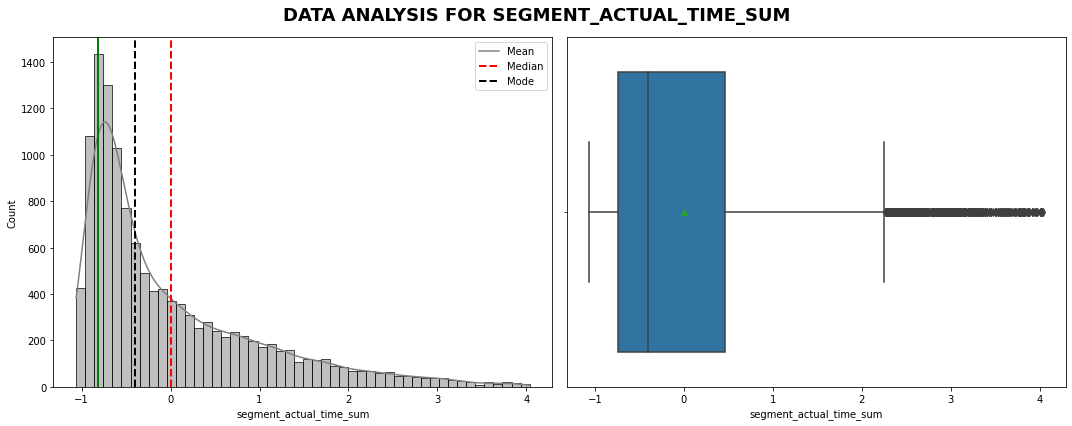

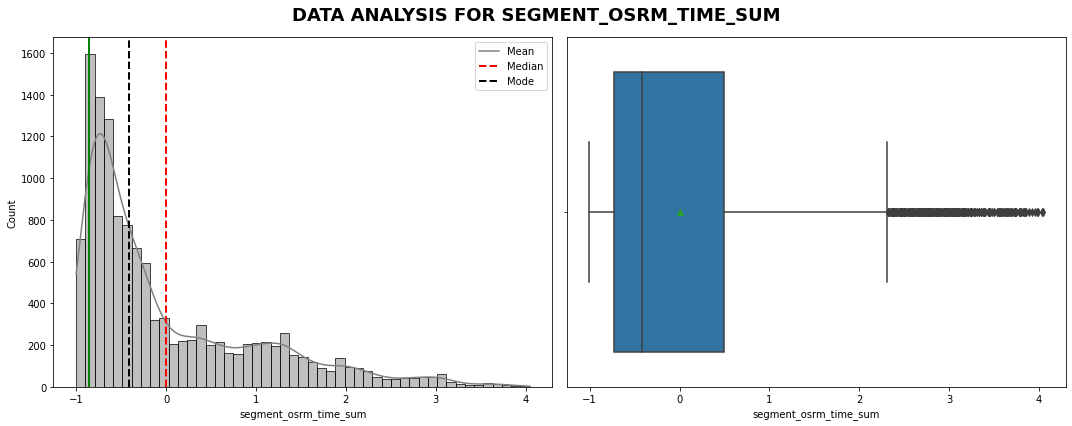

In [83]:
 # Univariate analysis for numerical/continuous variables
def num_feat(col_data):
    
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
    fig.suptitle("DATA ANALYSIS FOR "+ col_data.name.upper()  , fontsize=18, fontweight='bold')
    sns.histplot(col_data, kde=True, ax=ax[0], color = 'grey')
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].axvline(col_data.mode()[0],color='g',linestyle='solid',linewidth=2)
    
    
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median(),'Mode':col_data.mode()})
    plt.tight_layout()

num_cols = ['start_scan_to_end_scan',"od_timediff_in_hours", 
                'actual_distance_to_destination','osrm_distance','segment_osrm_distance_sum' ,
                'actual_time', 'osrm_time','segment_actual_time_sum', 'segment_osrm_time_sum']
for i in num_cols:
    num_feat(trip[i])

**Observations :**

* The distribution of data for almost every continuous features are right skewed.
* There is variation among the mean and median values for all numeric variables.
* Outliers are present in all features considered.

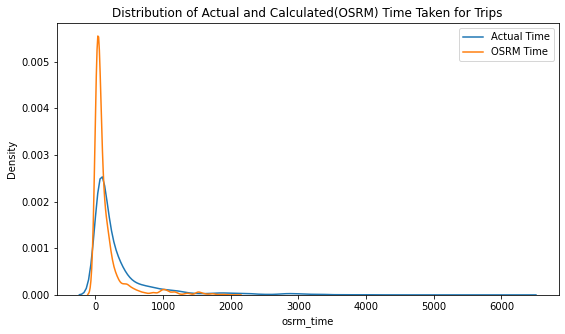

In [43]:
# Distribution of Actual and Calculated(OSRM) Time Taken for Trips
plt.figure(figsize=(9,5))
sns.distplot(trip["actual_time"], hist=False, label = "Actual Time")
sns.distplot(trip["osrm_time"], hist=False, label = "OSRM Time")
plt.legend()
plt.title("Distribution of Actual and Calculated(OSRM) Time Taken for Trips")
plt.show()


We see that actual time distribution has a kind of skewed distribution. Also, OSRM seems to
be calculating time taken as less than what time it actually takes. This might be because in actual
scenario, there might be delays caused by unprecedented traffic or other delays.


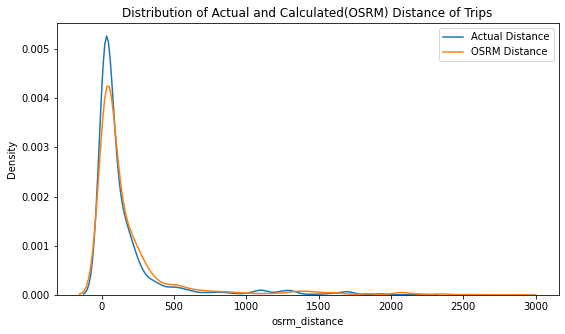

In [44]:
# Distribution of Actual and Calculated(OSRM) Distance of Trips
plt.figure(figsize=(9,5))
sns.distplot(trip["actual_distance_to_destination"], hist=False, label ="Actual Distance")
sns.distplot(trip["osrm_distance"], hist=False, label = "OSRM Distance")
plt.legend()
plt.title("Distribution of Actual and Calculated(OSRM) Distance of Trips")
plt.show()


We can see, the distributions are similar, however, OSRM distance has greater spread than actual
(which means distance covered actually is on the lower side as compared to OSRM calculated).

## **BIVARIATE ANALYSIS**

**Does the distribution of time taken depend on the route type (carting vs full truck
load)?** 

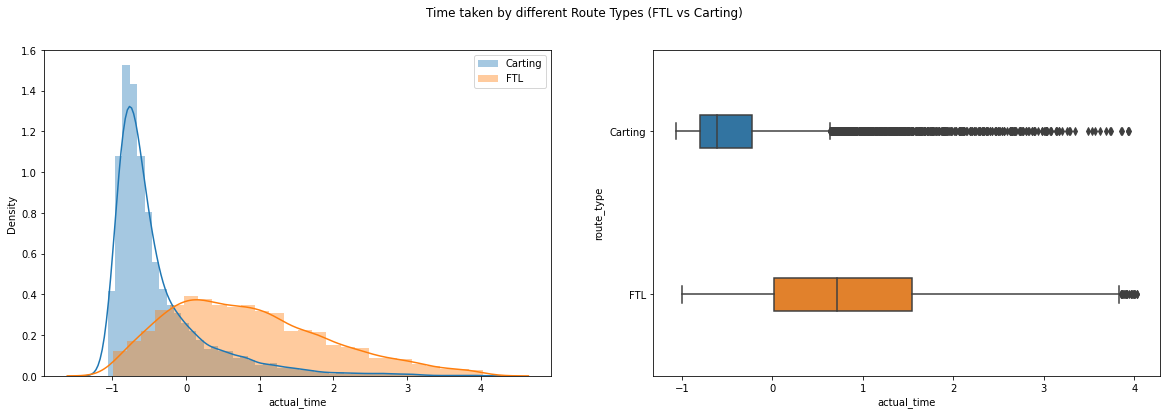

In [84]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(trip[trip["route_type"]==0]["actual_time"], label = "Carting", ax =ax[0])
sns.distplot(trip[trip["route_type"]==1]["actual_time"], label = "FTL", ax= ax[0])
sns.boxplot(x = "actual_time", y = "route_type", data = trip, orient='h',width=0.2, ax=ax[1])
ax[0].legend()
ax[1].set_yticklabels(["Carting","FTL"])
plt.suptitle("Time taken by different Route Types (FTL vs Carting)")
plt.show()


We see that the time taken by full truck load deliveries is on average, a lot higher (>300 hours)
(probably because the distance covered by trucks is also mucvh higher since they don’t make stops)
than the cart deliveries (<100 hours).


**Does the distribution of distance covered depend on the route type (carting vs full
truck load) ?**

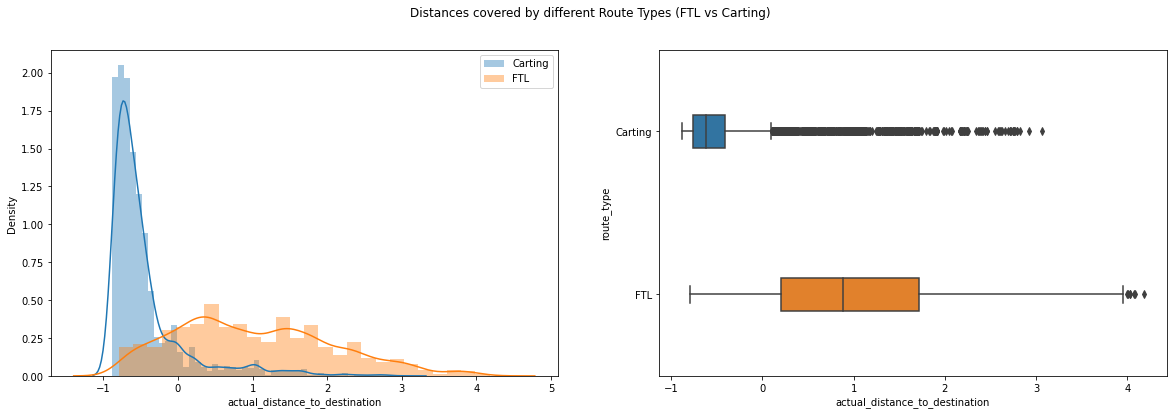

In [85]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(trip[trip["route_type"]==0]["actual_distance_to_destination"],label = "Carting", ax = ax[0])
sns.distplot(trip[trip["route_type"]==1]["actual_distance_to_destination"],label = "FTL", ax = ax[0])
sns.boxplot(x = "actual_distance_to_destination", y = "route_type", data = trip, orient='h', width=0.2, ax=ax[1])
ax[0].legend()
ax[1].set_yticklabels(["Carting","FTL"])
plt.suptitle("Distances covered by different Route Types (FTL vs Carting)")
plt.show()


The full truck load deliveries cover much longer distances on
average (>150 kms) than carting deliveries (~ 25 kms).

**Does the distribution of time taken and distance covered by deliveries depending on the hour
of the day?**

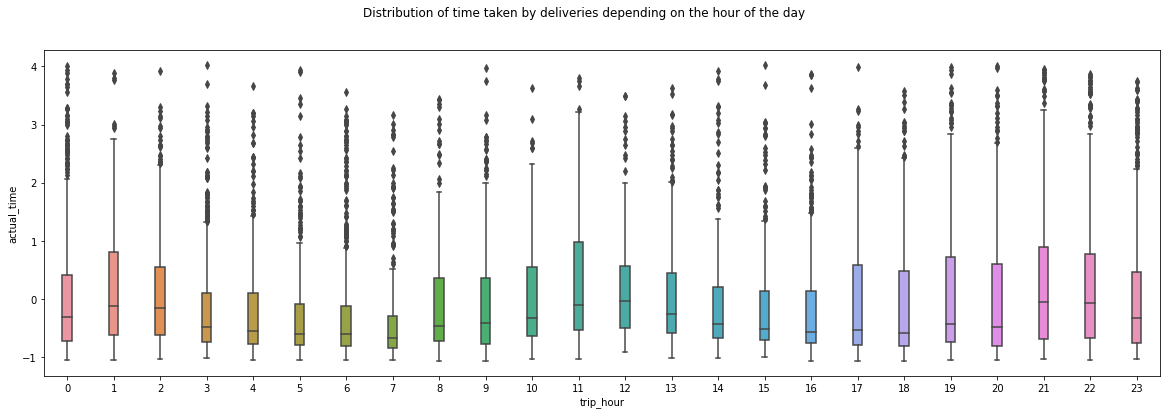

In [86]:
plt.figure(figsize=(20,6))
sns.boxplot(x = "trip_hour", y = "actual_time", data = trip, width=0.2)
plt.suptitle("Distribution of time taken by deliveries depending on the hour of the day")
plt.show()

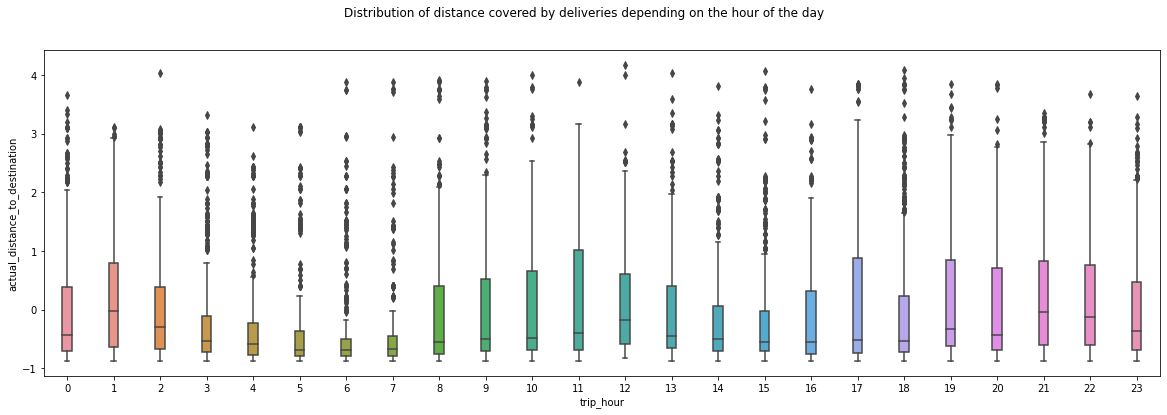

In [87]:
plt.figure(figsize=(20,6))
sns.boxplot(x = "trip_hour", y = "actual_distance_to_destination", data = trip,width=0.2)
plt.suptitle("Distribution of distance covered by deliveries depending on the hour of the day")
plt.show()

Time and distances follow similar trends against the hour of the day. Maximum time and distance
deliveries are likely to be made during peak morning hours of 10 AM to 12 PM as well as 5 PM, 7
PM and 1 AM.


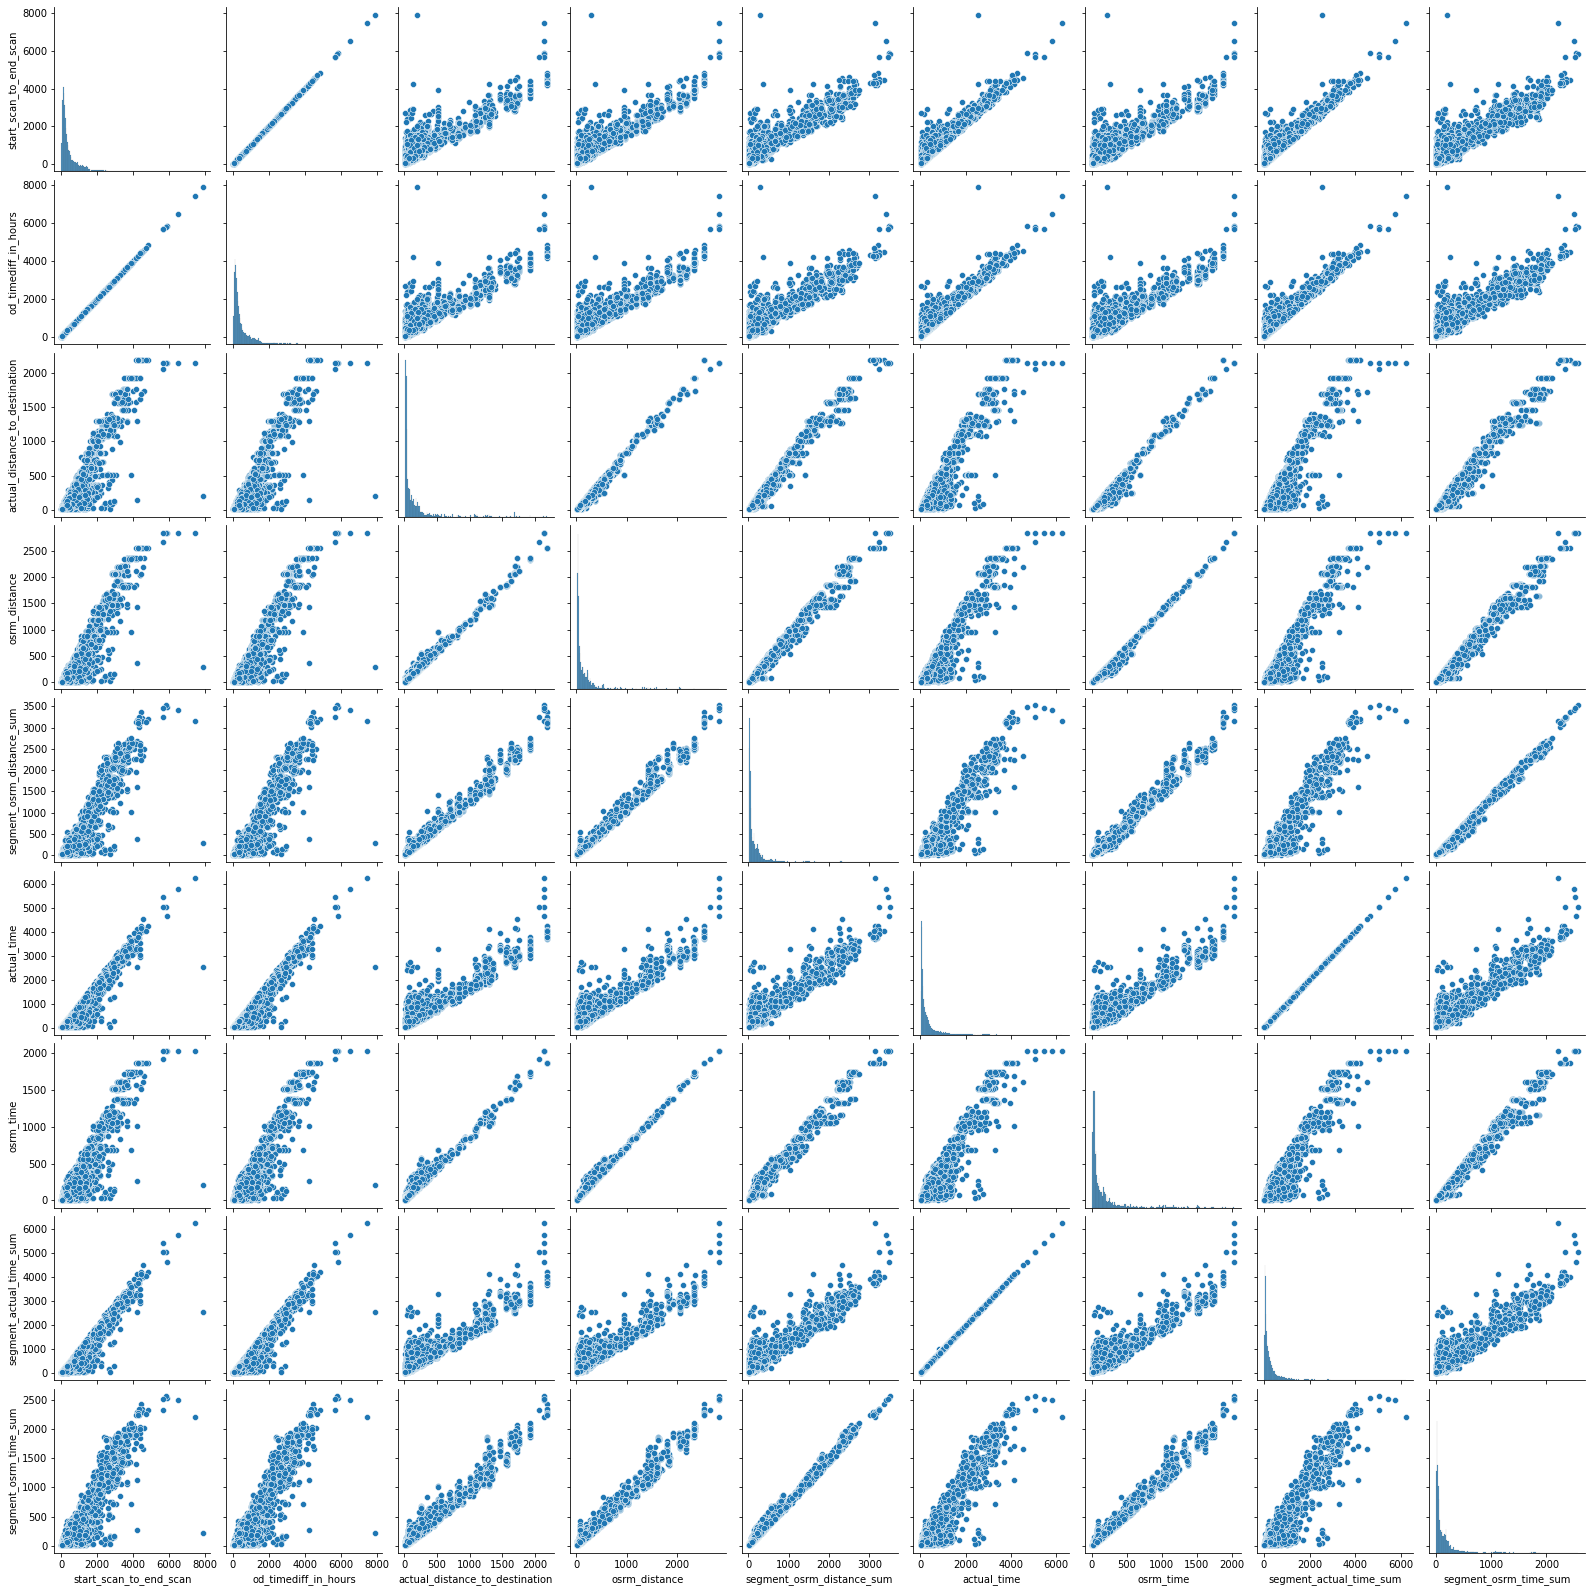

In [49]:
sns.pairplot(trip, vars=num_cols)
plt.show()

**Observations :**
* There is strong positive correlation between
> * start_scan_to_end_scan and difference between actual trip start time and trip end time.
> * actual_time and segment actual time (aggregated) 

* There is moderate positive correlation between
> * osrm time and segment osrm time (aggregated)
> * actual distance between source and destination and osrm distance

* There is less positive correlation between segment wise cumulative sum of actual time and osrm time.

## **MULTIVARIATE ANALYSIS**

In [51]:
trip.corr()

,start_scan_to_end_scan,od_timediff_in_hours,actual_distance_to_destination,osrm_distance,actual_time,osrm_time,segment_osrm_distance_sum,segment_actual_time_sum,segment_osrm_time_sum,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
start_scan_to_end_scan,1.000000,0.999999,0.919159,0.925205,0.961612,0.927471,0.920191,0.961634,0.919429,NaN,-0.002085,0.035923,0.007511,0.004071,0.005862
od_timediff_in_hours,0.999999,1.000000,0.919074,0.925126,0.961560,0.927416,0.920099,0.961582,0.919358,NaN,-0.002086,0.035981,0.007517,0.004079,0.005853
actual_distance_to_destination,0.919159,0.919074,1.000000,0.997268,0.953920,0.993568,0.993068,0.952987,0.987542,NaN,-0.004224,0.021010,0.003477,-0.003151,0.003917
osrm_distance,0.925205,0.925126,0.997268,1.000000,0.959398,0.997588,0.994712,0.958540,0.991802,NaN,-0.004859,0.023192,0.003981,-0.003458,0.003844
actual_time,0.961612,0.961560,0.953920,0.959398,1.000000,0.958781,0.957151,0.999989,0.954044,NaN,-0.006613,0.013044,0.006641,-0.002737,0.003314
osrm_time,0.927471,0.927416,0.993568,0.997588,0.958781,1.000000,0.991624,0.957955,0.993263,NaN,-0.006612,0.026697,0.004094,-0.005874,0.003922
segment_osrm_distance_sum,0.920191,0.920099,0.993068,0.994712,0.957151,0.991624,1.000000,0.956293,0.996098,NaN,-0.003171,0.018242,0.003918,-0.001163,0.004061
segment_actual_time_sum,0.961634,0.961582,0.952987,0.958540,0.999989,0.957955,0.956293,1.000000,0.953214,NaN,-0.006515,0.013064,0.006612,-0.002630,0.003313
segment_osrm_time_sum,0.919429,0.919358,0.987542,0.991802,0.954044,0.993263,0.996098,0.953214,1.000000,NaN,-0.004629,0.021090,0.004274,-0.002909,0.004270
trip_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Correlation among pairs of continuous variables**

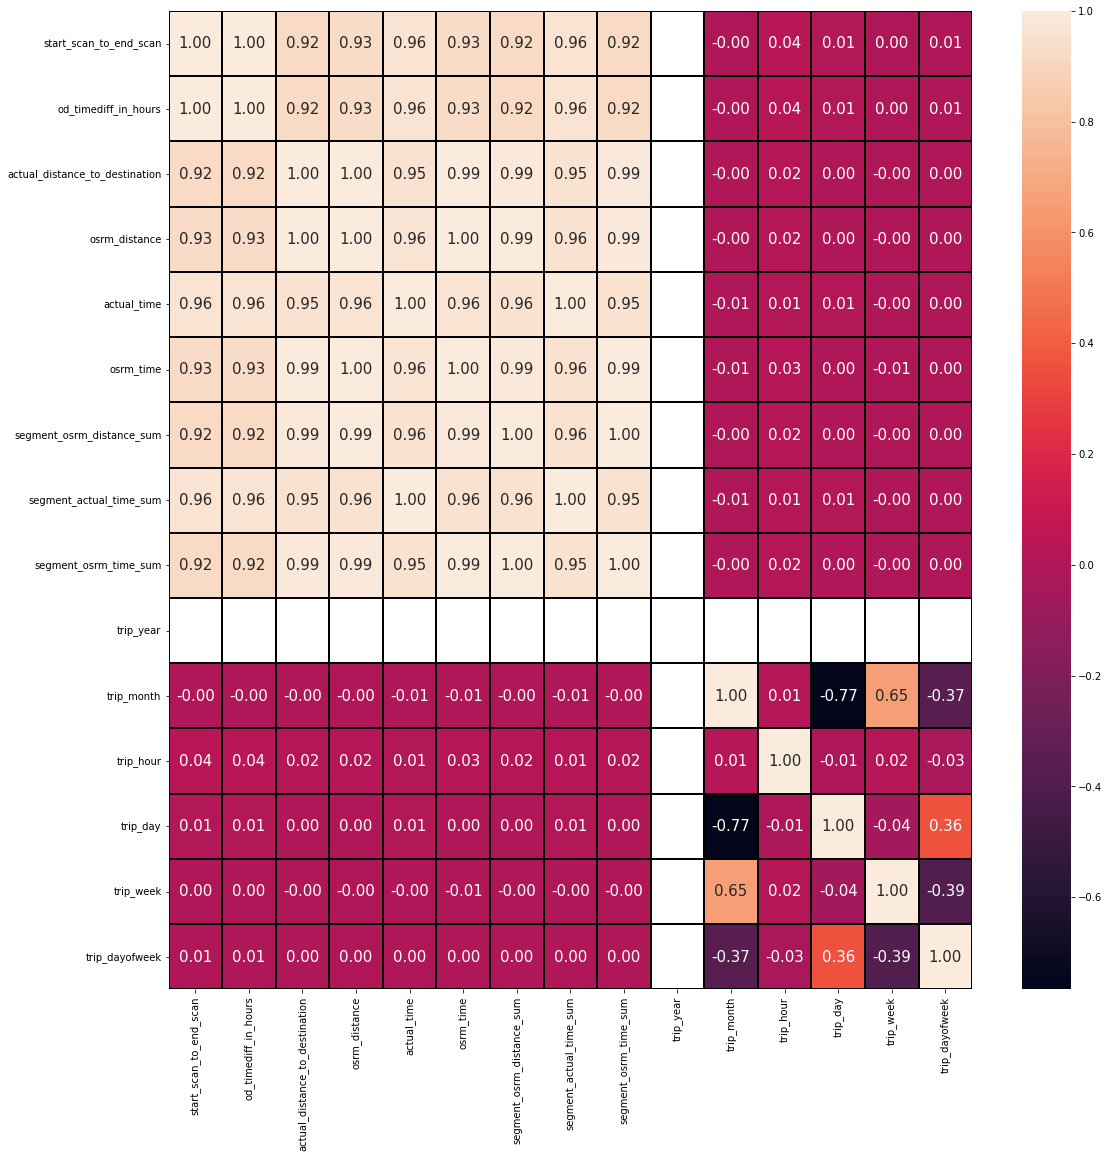

In [52]:
# heatmap of the data for checking the correlation between the features and target column.

plt.figure(figsize = (18,18))
sns.heatmap(trip.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15},linewidth = 2,linecolor = "black")
plt.show()

**Observations :**
From the heatmap we get the correlation values between every features.
* There is strong positive correlation between
> * start_scan_to_end_scan and difference between actual trip start time and trip end time.
> * actual_time and segment actual time (aggregated) 

* There is moderate positive correlation between
> * osrm time and segment osrm time (aggregated)
> * actual distance between source and destination and osrm distance

* There is less positive correlation between segment wise cumulative sum of actual time and osrm time.

## **HYPOTHESIS TESTING & VISUAL ANALYSIS**

**Steps for performing hypothesis testing.**
1. Set up Null Hypothesis (H0)
2. State the alternate hypothesis (H1)
3. Set a significance level (alpha = 0.05)
4. Calculate test statistics.
5. Decision to accept or reject null hypothesis.

### 1) **od_timediff_in_hours  and  start_scan_to_end_scan**

Two sample t-test is used to check whether the means of two samples(group) are same or different.

   We want to check whether  actual time and estimated time taken for package delivery from source to destination are equal or not.For this, we calculated the difference between od_start_time and od_end_time ie, od_timediff_in_hours and keep it as a feature. Here we do hypothesis testing and check whether the od_timediff_in_hours and start_scan_to_end_scan are equal or not.

**Step 1** : Setting up Null Hypothesis (H0) and stating the alternate hypothesis (Ha).

* Actual trip duration is given by difference of od_start_time and od_end_time ie, **od_timediff_in_hours** 
* Estimated trip duration calculated by algorithm is given by **start_scan_to_end_scan**

Let μ1, μ2 be the respective population means for od_timediff_in_hours and start_scan_to_end_scan.

   > **H0 : μ1−μ2 = 0**   
       ie, Actual time and estimated time taken for package delivery trip from source to destination are equal.
  
   > **H1 : μ1−μ2  != 0**   
       ie, Actual time and estimated time taken for package delivery trip from source to destination are not equal.

In [53]:
trip[[ 'od_timediff_in_hours','start_scan_to_end_scan']].head()

,od_timediff_in_hours,start_scan_to_end_scan
0,2260.11,2259.0
1,181.61,180.0
2,3934.36,3933.0
3,100.49,100.0
4,718.34,717.0


**The time taken between od_start_time and od_end_time ie, od_timediff_in_hours and start_scan_to_end_scan are nearly equal.**

In [54]:
trip[[ 'od_timediff_in_hours','start_scan_to_end_scan']].describe().T

,count,mean,std,min,25%,50%,75%,max
od_timediff_in_hours,14787.0,530.313468,658.415416,23.46,149.695,279.71,633.535,7898.55
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.00,149.000,279.00,632.000,7898.00


In [55]:
# Calculating the p-value and test- statistics using ttest_ind() 

print("H0: Actual duration and Estimated duration for package delivery from source to destination are equal")
print("H1: Actual duration and Estimated duration for package delivery from source to destination are  not equal.")
print("-"*80)
print("Type of test is two-tailed") 
print("Alpha:" ,0.05)
t_test, p_value = stats.ttest_ind(trip[ 'od_timediff_in_hours'],trip['start_scan_to_end_scan']) 
print("Test Statistic: ",t_test.round(3))
print("P value: ",p_value.round(3))
print("-"*80)
p_value = p_value.round(3)
alpha = 0.05
if p_value>alpha:
    print("Conclusion: Since p-value {} is greater than alpha {} ". format (p_value,alpha) )
    print("We fail to reject the null hypothesis")
    print("ie, Actual duration and Estimated duration for package delivery from source to destination are equal")
else:
    print("Conclusion: Since p-value {} is less than alpha {} ". format (p_value,alpha) )
    print("We reject the null hypothesis")
    print("ie, Actual duration and Estimated duration for package delivery trip from source to destination are not equal")

H0: Actual duration and Estimated duration for package delivery from source to destination are equal
H1: Actual duration and Estimated duration for package delivery from source to destination are  not equal.
--------------------------------------------------------------------------------
Type of test is two-tailed
Alpha: 0.05
Test Statistic:  0.116
P value:  0.908
--------------------------------------------------------------------------------
Conclusion: Since p-value 0.908 is greater than alpha 0.05 
We fail to reject the null hypothesis
ie, Actual duration and Estimated duration for package delivery from source to destination are equal


**Observations :**

* As the p value > alpha(0.05) , we fail to reject the null hypothesis and thus we can conclude that actual duration and estimated duration for package delivery from source to destination are equal.

We can confirm this using the scatter plot as well.

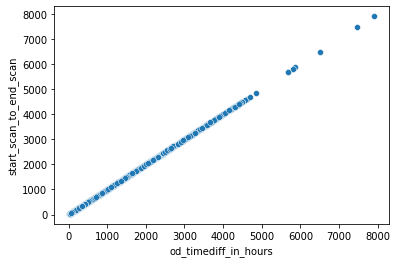

In [56]:
sns.scatterplot(trip['od_timediff_in_hours'],trip['start_scan_to_end_scan'])
plt.show()

**Observations :**
    There is strong positive correlation between start_scan_to_end_scan and difference between actual trip start time and trip end time, which supports our hypothesis test result.

### 2) **Actual time and OSRM time**

OSRM time is the time calculated by Open Source Routing Machine for each package delivery.We need to check whether actual time taken for package delivery between source and destination are equal or not.For validation we use T test for hypothesis testing.

**Step 1** : Setting up Null Hypothesis (H0) and stating the alternate hypothesis (Ha).


Let μ1, μ2 be the respective population means for Actual time and OSRM time.

   > **H0 : μ1−μ2 = 0**   
       ie, Actual time and OSRM time calculated for package delivery trip from source to destination are equal.
  
   > **H1 : μ1−μ2  > 0**   
       ie, Actual time calculated for package delivery trip from source to destination are greater than OSRM time.

In [57]:
trip[['actual_time', 'osrm_time']].head()

,actual_time,osrm_time
0,1562.0,717.0
1,143.0,68.0
2,3347.0,1740.0
3,59.0,15.0
4,341.0,117.0


In [58]:
trip[['actual_time', 'osrm_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,14787.0,356.306012,561.517936,9.0,67.0,148.0,367.0,6265.0
osrm_time,14787.0,160.990938,271.459495,6.0,29.0,60.0,168.0,2032.0


In [59]:
# Calculating the p-value and test- statistics using T test 

print("H0: Actual time and OSRM for package delivery is equal.")
print("H1: Actual time calculated for package delivery from source to destination are greater than OSRM time.")
print("-"*80)
print("Type of test is right-tailed") 
print("Alpha:" ,0.05)
Ttest_score, p_value= ttest_ind(trip["actual_time"],trip["osrm_time"],alternative='greater') 
print("Test Statistic: ",Ttest_score.round(3))
print("P value: ",p_value)
print("-"*80)
p_value = p_value
alpha = 0.05
if p_value>alpha:
    print("Conclusion: Since p-value {} is greater than alpha {} ". format (p_value,alpha) )
    print("We fail to reject the null hypothesis ie, Actual time and OSRM time for package delivery is equal.")
else:
    print("Conclusion: Since p-value {} is less than alpha {} ". format (p_value,alpha) )
    print("We reject the null hypothesis")
    print("ie, Actual time calculated for package delivery from source to destination are greater than OSRM time.")

H0: Actual time and OSRM for package delivery is equal.
H1: Actual time calculated for package delivery from source to destination are greater than OSRM time.
--------------------------------------------------------------------------------
Type of test is right-tailed
Alpha: 0.05
Test Statistic:  38.081
P value:  4.10730956717236e-310
--------------------------------------------------------------------------------
Conclusion: Since p-value 4.10730956717236e-310 is less than alpha 0.05 
We reject the null hypothesis
ie, Actual time calculated for package delivery from source to destination are greater than OSRM time.


**Observations :**

* As the p value < alpha(0.05) , we reject the null hypothesis and thus we can conclude that actual time calculated for package delivery from source to destination are greater than OSRM time.

We can confirm this using the scatter plot as well.

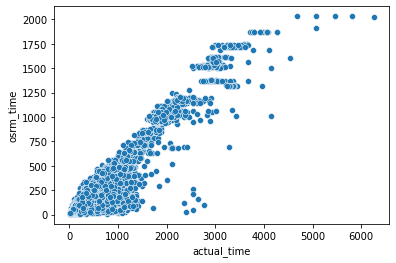

In [60]:
sns.scatterplot(trip['actual_time'],trip['osrm_time'])
plt.show()

**Observations :**

There is minimal correlation between actual time and OSRM time as the points are scattered, which supports our hypothesis test result.

### 3) **Actual_time  and Segment_actual_time**

Segment_actual_time is the segment time ie, the time taken by the subset of the package delivery time.We need to check whether actual time and aggregated segment time taken for package delivery between source and destination are equal or not.For validation we use T test for hypothesis testing.

**Step 1** : Setting up Null Hypothesis (H0) and stating the alternate hypothesis (Ha).


Let μ1, μ2 be the respective population means for actual time and Segment time(aggregated).

   > **H0 : μ1−μ2 = 0**   
       ie, Actual time and Segment time(aggregated) calculated for package delivery  from source to destination are equal.
  
   > **H1 : μ1−μ2  > 0**   
       ie, Actual time calculated for package delivery from source to destination are greater than Segment time(aggregated).

In [61]:
trip[['actual_time', 'segment_actual_time_sum']].head()

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0


In [62]:
trip[['actual_time', 'segment_actual_time_sum']].describe().T

,count,mean,std,min,25%,50%,75%,max
actual_time,14787.0,356.306012,561.517936,9.0,67.0,148.0,367.0,6265.0
segment_actual_time_sum,14787.0,353.059174,556.365911,9.0,66.0,147.0,364.0,6230.0


In [63]:
# Calculating the p-value and test- statistics using ttest_ind() 

print("H0: Actual time and Segment time(aggregated) calculated for package delivery from source to destination are equal.")
print("H1: Actual time calculated for package delivery from source to destination are greater than Segment time(aggregated)")
print("-"*80)
print("Type of test is right-tailed") 
print("Alpha:" ,0.05)
t_test, p_value = stats.ttest_ind(trip["actual_time"],trip["segment_actual_time_sum"],alternative = "greater") 
print("Test Statistic: ",t_test.round(3))
print("P value: ",p_value.round(3))
print("-"*80)
p_value = p_value.round(3)
alpha = 0.05
if p_value>alpha:
    print("Conclusion: Since p-value {} is greater than alpha {} ". format (p_value,alpha) )
    print("We fail to reject the null hypothesis")
    print("ie, Actual time and Segment time(aggregated) calculated for package delivery from source to destination are equal.")
else:
    print("Conclusion: Since p-value {} is less than alpha {} ". format (p_value,alpha) )
    print("We reject the null hypothesis")
    print("ie,Actual time calculated for package delivery from source to destination are greater than Segment time(aggregated)")

H0: Actual time and Segment time(aggregated) calculated for package delivery from source to destination are equal.
H1: Actual time calculated for package delivery from source to destination are greater than Segment time(aggregated)
--------------------------------------------------------------------------------
Type of test is right-tailed
Alpha: 0.05
Test Statistic:  0.499
P value:  0.309
--------------------------------------------------------------------------------
Conclusion: Since p-value 0.309 is greater than alpha 0.05 
We fail to reject the null hypothesis
ie, Actual time and Segment time(aggregated) calculated for package delivery from source to destination are equal.


**Observations :**

* As the p value > alpha(0.05) , we fail to reject the null hypothesis and thus we can conclude that actual time taken to complete the delivery and time taken by the subset of the package delivery (cumulative) is equal.

We can confirm this using the scatter plot as well.

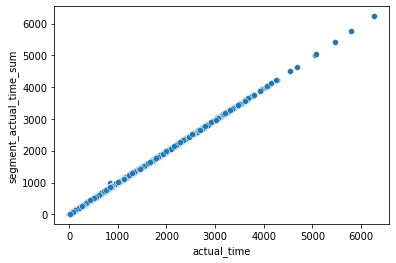

In [64]:
sns.scatterplot(trip["actual_time"],trip["segment_actual_time_sum"])
plt.show()

**Observations :**
    There is strong positive correlation between actual time and segment time(aggregated) which supports our hypothesis test. result.

### 4) **OSRM_distance and Segment_OSRM_distance**

Segment_osrm_distance is the OSRM segment distance ie, the distance covered by subset of the package delivery.We need to check whether OSRM distance and aggregated OSRM segment distance covered for package delivery between source and destination are equal or not.For validation we use T test for hypothesis testing.

**Step 1** : Setting up Null Hypothesis (H0) and stating the alternate hypothesis (Ha).


Let μ1, μ2 be the respective population means for OSRM distance and Segment_osrm_distance (aggregated).

   > **H0 : μ1−μ2 = 0**   
       ie, OSRM distance and Segment_osrm_distance(aggregated) calculated  between source and destination are equal.
  
   > **H1 : μ1−μ2  != 0**   
       ie, OSRM distance and Segment_osrm_distance(aggregated) calculated between source and destination are not equal.

In [65]:
trip[["osrm_distance","segment_osrm_distance_sum"]].head()

,osrm_distance,segment_osrm_distance_sum
0,991.3523,1320.4733
1,85.1110,84.1894
2,2354.0665,2545.2678
3,19.6800,19.8766
4,146.7918,146.7919


In [66]:
trip[["osrm_distance","segment_osrm_distance_sum"]].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_distance,14787.0,203.887411,370.565564,9.0729,30.75690,65.3028,206.6442,2840.0810
segment_osrm_distance_sum,14787.0,222.705466,416.846279,9.0729,32.57885,69.7842,216.5606,3523.6324


In [67]:
# Calculating the p-value and test- statistics using ttest_ind() 

print("H0: OSRM distance and Segment_osrm_distance (aggregated) calculated  between source and destination are equal.")
print("H1: OSRM distance and Segment_osrm_distance (aggregated) calculated  between source and destination are not equal.")
print("-"*80)
print("Type of test is two-tailed") 
print("Alpha:" ,0.05)
t_test, p_value = stats.ttest_ind(trip["osrm_distance"],trip["segment_osrm_distance_sum"]) 
print("Test Statistic: ",t_test.round(3))
print("P value: ",p_value)
print("-"*80)
p_value = p_value
alpha = 0.05
if p_value>alpha:
    print("Conclusion: Since p-value {} is greater than alpha {} ". format (p_value,alpha) )
    print("We fail to reject the null hypothesis")
    print("ie, OSRM distance and Segment_osrm_distance(aggregated) calculated for package delivery between source and destination are equal.")
else:
    print("Conclusion: Since p-value {} is less than alpha {} ". format (p_value,alpha) )
    print("We reject the null hypothesis")
    print("ie, OSRM distance and Segment_osrm_distance(aggregated) calculated for package delivery between source and destination are not equal.")

H0: OSRM distance and Segment_osrm_distance (aggregated) calculated  between source and destination are equal.
H1: OSRM distance and Segment_osrm_distance (aggregated) calculated  between source and destination are not equal.
--------------------------------------------------------------------------------
Type of test is two-tailed
Alpha: 0.05
Test Statistic:  -4.103
P value:  4.092957819120332e-05
--------------------------------------------------------------------------------
Conclusion: Since p-value 4.092957819120332e-05 is less than alpha 0.05 
We reject the null hypothesis
ie, OSRM distance and Segment_osrm_distance(aggregated) calculated for package delivery between source and destination are not equal.


**Observations :**

* As the p value < alpha(0.05) , we reject the null hypothesis and thus we can conclude that OSRM distance and Segment_osrm_distance (aggregated) calculated for package delivery between source and destination are not equal.

We can confirm this using the scatter plot as well.

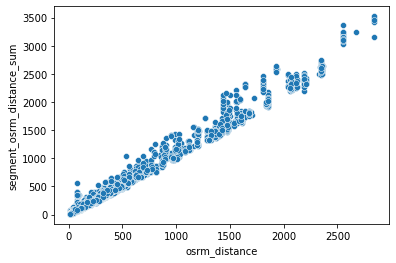

In [68]:
sns.scatterplot(trip["osrm_distance"], trip["segment_osrm_distance_sum"])
plt.show()

**Observations :**

There is moderate correlation between OSRM distance and Segment_osrm_distance (aggregated), which supports our hypothesis test result.

### 5) **OSRM_time and Segment_osrm_time**

Segment_osrm_time is the OSRM segment time ie, time taken by the subset of the package delivery is the time taken by the subset of the package delivery time.We need to check whether OSRM time and aggregated OSRM segment time taken for package delivery between source and destination are equal or not.For validation we use T test for hypothesis testing.

**Step 1** : Setting up Null Hypothesis (H0) and stating the alternate hypothesis (Ha).


Let μ1, μ2 be the respective population means for OSRM time and OSRM segment time(aggregated).

   > **H0 : μ1−μ2 = 0**   
       ie,  OSRM time and OSRM segment time (aggregated) calculated between source and destination are equal.
  
   > **H1 : μ1−μ2  < 0**   
       ie, OSRM time calculated for package delivery from source to destination is lesser than OSRM segment time (aggregated).

In [69]:
trip[["osrm_time","segment_osrm_time_sum"]].head()

,osrm_time,segment_osrm_time_sum
0,717.0,1008.0
1,68.0,65.0
2,1740.0,1941.0
3,15.0,16.0
4,117.0,115.0


In [70]:
trip[["osrm_time","segment_osrm_time_sum"]].describe().T

,count,mean,std,min,25%,50%,75%,max
osrm_time,14787.0,160.990938,271.459495,6.0,29.0,60.0,168.0,2032.0
segment_osrm_time_sum,14787.0,180.511598,314.679279,6.0,30.0,65.0,184.0,2564.0


In [71]:
# Calculating the p-value and test- statistics using ttest_ind() 

print("H0: OSRM time and OSRM segment time (aggregated) calculated between source and destination are equal")
print("H1: OSRM time calculated for package delivery from source to destination is lesser than OSRM segment time (aggregated).")
print("-"*80)
print("Type of test is left-tailed") 
print("Alpha:" ,0.05)
t_test, p_value = stats.ttest_ind(trip["osrm_time"],trip["segment_osrm_time_sum"],alternative = "less") 
print("Test Statistic: ",t_test.round(3))
print("P value: ",p_value)
print("-"*80)
p_value = p_value
alpha = 0.05
if p_value>alpha:
    print("Conclusion: Since p-value {} is greater than alpha {} ". format (p_value,alpha) )
    print("We fail to reject the null hypothesis")
    print("ie, OSRM time and OSRM segment time (aggregated) calculated between source and destination are equal")
else:
    print("Conclusion: Since p-value {} is less than alpha {} ". format (p_value,alpha) )
    print("We reject the null hypothesis")
    print("OSRM time calculated for package delivery from source to destination is lesser than OSRM segment time (aggregated).")

H0: OSRM time and OSRM segment time (aggregated) calculated between source and destination are equal
H1: OSRM time calculated for package delivery from source to destination is lesser than OSRM segment time (aggregated).
--------------------------------------------------------------------------------
Type of test is left-tailed
Alpha: 0.05
Test Statistic:  -5.712
P value:  5.643517343224684e-09
--------------------------------------------------------------------------------
Conclusion: Since p-value 5.643517343224684e-09 is less than alpha 0.05 
We reject the null hypothesis
OSRM time calculated for package delivery from source to destination is lesser than OSRM segment time (aggregated).


**Observations :**

* As the p value < alpha(0.05) , we reject the null hypothesis and thus we can conclude that OSRM time calculated for package delivery from source to destination is lesser than OSRM segment time (aggregated).

We can confirm this using the scatter plot as well.

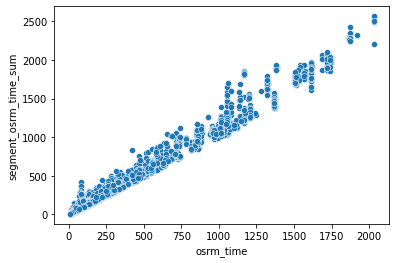

In [72]:
sns.scatterplot(trip["osrm_time"],trip["segment_osrm_time_sum"])
plt.show()

**Observations :**

There is moderate correlation between OSRM time and OSRM segment time (aggregated), which supports our hypothesis test result.

**CONCLUSIONS :**
Based on hypothesis test done using T test, we conclude that:
   * Actual trip duration and estimated trip duration for package delivery from source to destination are equal.
   * Actual time calculated for package delivery from source to destination are greater than OSRM time.
   * Actual time taken to complete the delivery and Segment_actual_time(aggregated) ie, time taken by the subset of the package delivery  is equal.
   * OSRM distance and Segment_osrm_distance (aggregated) calculated for package delivery between source and destination are not equal.
   * OSRM time calculated for package delivery from source to destination is lesser than OSRM segment time (aggregated).
    

## **Outlier treatment**

In [73]:
numeric_cols = ['start_scan_to_end_scan','od_timediff_in_hours', 'actual_distance_to_destination', 'actual_time', 'osrm_time',
            'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
            'segment_osrm_time_sum']

trip[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,14787.0,529.429025,658.254936,23.000000,149.000000,279.000000,632.000000,7898.000000
od_timediff_in_hours,14787.0,530.313468,658.415416,23.460000,149.695000,279.710000,633.535000,7898.550000
actual_distance_to_destination,14787.0,164.090196,305.502982,9.002461,22.777099,48.287894,163.591258,2186.531787
actual_time,14787.0,356.306012,561.517936,9.000000,67.000000,148.000000,367.000000,6265.000000
osrm_time,14787.0,160.990938,271.459495,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14787.0,203.887411,370.565564,9.072900,30.756900,65.302800,206.644200,2840.081000
segment_actual_time_sum,14787.0,353.059174,556.365911,9.000000,66.000000,147.000000,364.000000,6230.000000
segment_osrm_distance_sum,14787.0,222.705466,416.846279,9.072900,32.578850,69.784200,216.560600,3523.632400
segment_osrm_time_sum,14787.0,180.511598,314.679279,6.000000,30.000000,65.000000,184.000000,2564.000000


<AxesSubplot:>

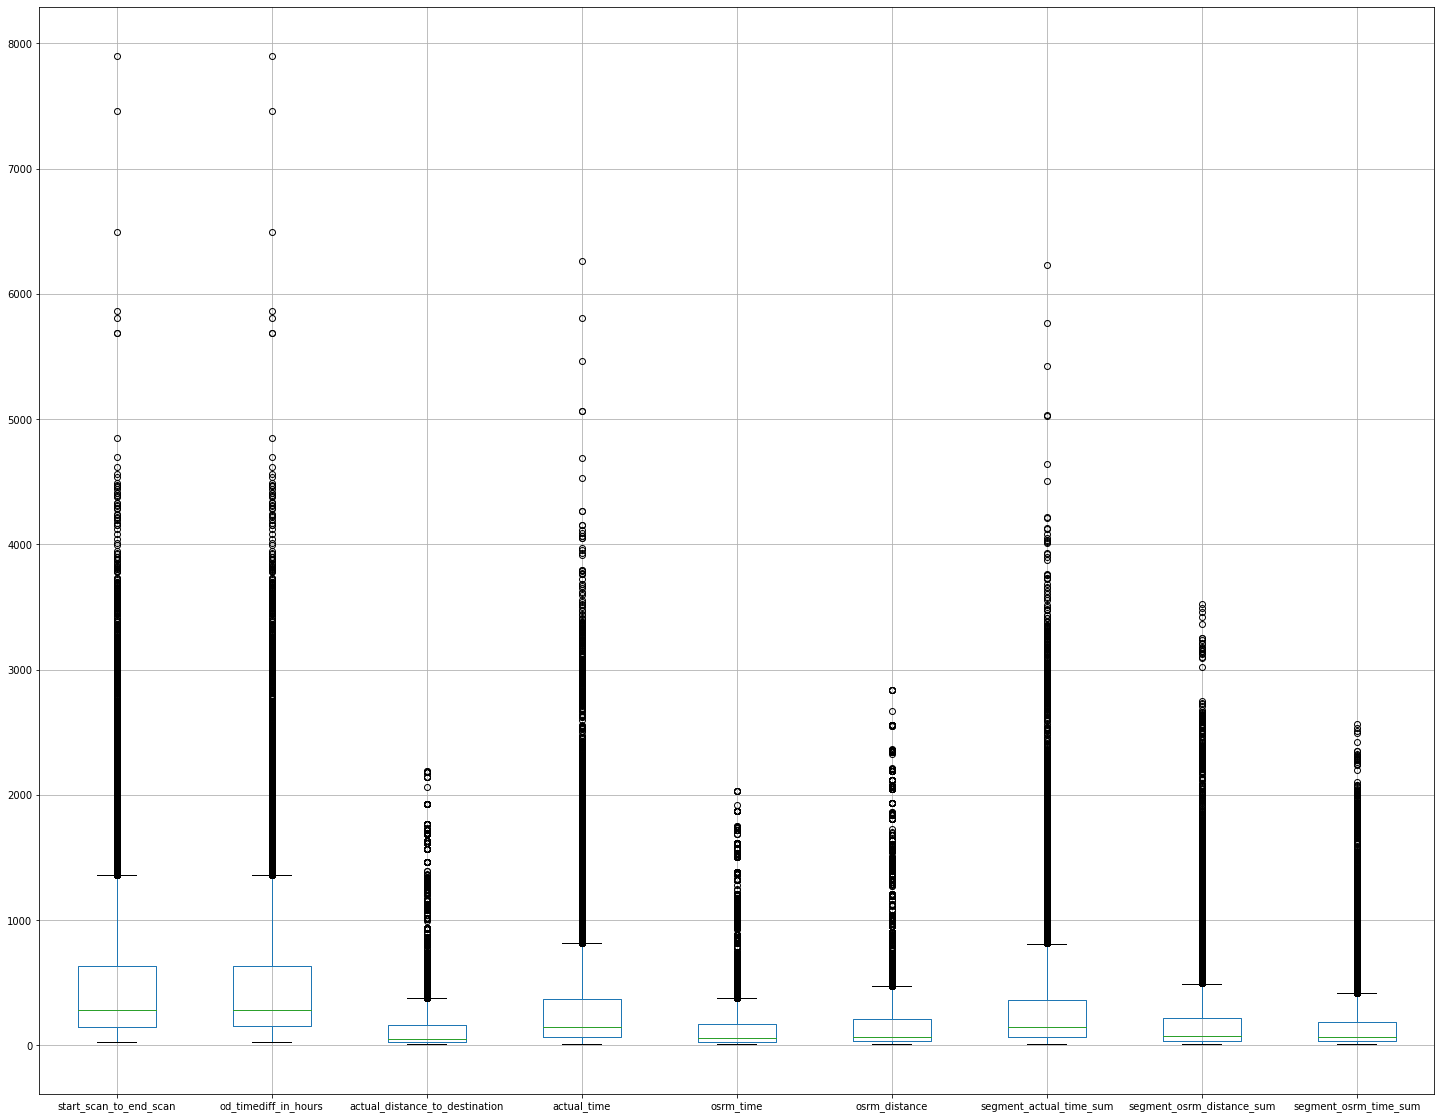

In [74]:
trip[numeric_cols].boxplot(figsize=(25,20))

**IQR METHOD FOR OUTLIER REMOVAL**

In [75]:
q1 = trip[numeric_cols].quantile(0.25)
q3 = trip[numeric_cols].quantile(0.75)
IQR = q3 - q1
trip = trip[~((trip[numeric_cols] < (q1 - 1.5 * IQR)) | (trip[numeric_cols] > (q3 + 1.5 * IQR))).any(axis=1)]
trip = trip.reset_index(drop=True) 

<AxesSubplot:>

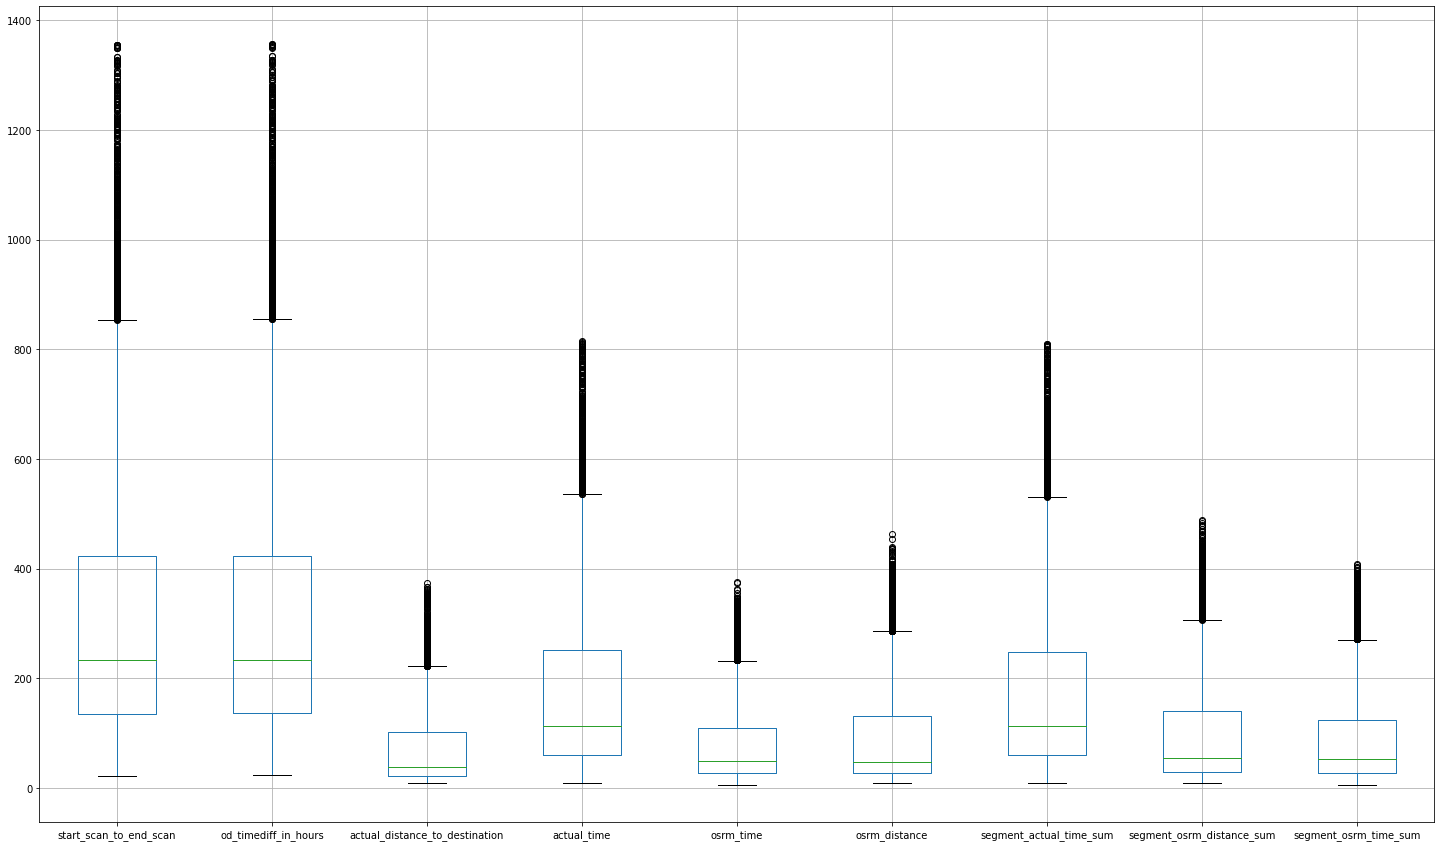

In [76]:
trip[numeric_cols].boxplot(figsize=(25,15))

In [77]:
trip[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,12723.0,320.178731,255.555831,23.000000,136.000000,233.000000,423.000000,1355.000000
od_timediff_in_hours,12723.0,321.022695,255.885466,23.460000,136.520000,233.550000,423.905000,1357.400000
actual_distance_to_destination,12723.0,72.317812,72.070232,9.002461,21.395561,38.525319,101.673567,373.441224
actual_time,12723.0,177.452723,158.150841,9.000000,61.000000,114.000000,251.000000,815.000000
osrm_time,12723.0,78.440305,72.333674,6.000000,27.000000,50.000000,109.000000,376.000000
osrm_distance,12723.0,91.734030,89.566572,9.072900,28.344450,48.418300,131.316850,463.478100
segment_actual_time_sum,12723.0,175.796274,157.099770,9.000000,60.000000,113.000000,248.000000,810.000000
segment_osrm_distance_sum,12723.0,97.971558,94.819043,9.072900,29.437950,54.090300,140.529400,489.571600
segment_osrm_time_sum,12723.0,85.908355,79.604978,6.000000,28.000000,53.000000,125.000000,408.000000


**Observations :**
* After removal of outliers by IQR method,the mean and median values for: 
> * start_scan_to_end_scan and od_timediff_in_hours are nearly equal.
> * actual_time and segment_actual_time_sum are nearly equal
> * osrm_time and segment_osrm_time_sum have less variation.
> * osrm_distance and segment_osrm_distance_sum have slightly larger variation.

## **One-hot encoding technique**

   One-Hot-Encoding is used to create dummry variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.
   
   Here we consider "**route_type**" for one-hot encoding process

In [78]:
trip['route_type'].value_counts()

Carting    8812
FTL        3911
Name: route_type, dtype: int64

In [79]:
trip['route_type'] = trip['route_type'].map({'Carting':0,'FTL':1})
trip.sample(5)

,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_timediff_in_hours,actual_distance_to_destination,...,dest_state,dest_city,dest_place,dest_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
5531,2018-09-20 22:29:23.671440,1,trip-153748256367122474,IND788026AAC,silchar_sirikona_h (assam),IND788026AAC,silchar_sirikona_h (assam),776.0,778.03,81.680270,...,assam,silchar,sirikona,h,2018,9,22,20,38,3
5582,2018-09-20 23:56:16.734246,1,trip-153748777673387260,IND421302AAG,bhiwandi_mankoli_hb (maharashtra),IND411033AAA,pune_tathawde_h (maharashtra),331.0,331.49,100.833236,...,maharashtra,pune,tathawde,h,2018,9,23,20,38,3
2633,2018-09-16 01:47:22.558401,1,trip-153706244255817690,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND125005AAA,hisar_indstlar_i (haryana),759.0,760.98,183.879758,...,haryana,hisar,indstlar,i,2018,9,1,16,37,6
9696,2018-09-28 00:43:14.597933,0,trip-153809539459768067,IND560300AAA,bengaluru_kgairprt_hb (karnataka),IND560099AAB,bengaluru_bomsndra_hb (karnataka),364.0,364.42,42.235022,...,karnataka,bengaluru,bomsndra,hb,2018,9,0,28,39,4
11264,2018-10-01 02:36:06.185026,0,trip-153836136618475409,IND501359AAE,hyderabad_shamshbd_h (telangana),IND500008AAC,hyderabad_tolichwk_i (telangana),179.0,179.48,17.509460,...,telangana,hyderabad,tolichwk,i,2018,10,2,1,40,0


## **Normalize/ Standardize the numerical features** 

   Here we convert variables with different scales of measurements into a single scale using **StandardScaler** for normalization of numerical variables.

StandardScaler normalizes the data using the formula **(x-mean)/standard deviation**.

In [80]:
from sklearn.preprocessing import StandardScaler


#Scales the data and returns the z-scores of the values of the attribute
scaler = StandardScaler()
scaler.fit(trip[numeric_cols])
trip[numeric_cols] = scaler.transform(trip[numeric_cols])
trip[numeric_cols].head(10)

,start_scan_to_end_scan,od_timediff_in_hours,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,-0.548546,-0.544846,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662
1,-0.861602,-0.861875,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225
2,1.552838,1.552776,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464
3,-0.513328,-0.510142,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288
4,-0.869428,-0.871568,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913
5,-0.681595,-0.680732,-0.692319,-0.717399,-0.614403,-0.701335,-0.711654,-0.728271,-0.652100
6,-0.157227,-0.157040,-0.650266,-0.104036,-0.683530,-0.678830,-0.094188,-0.707014,-0.714912
7,-1.061175,-1.061816,-0.866490,-0.976655,-0.973863,-0.913071,-0.972645,-0.863632,-0.903350
8,-0.971171,-0.969467,-0.814989,-0.742692,-0.849435,-0.816692,-0.737116,-0.837237,-0.865663
9,-1.104220,-1.104142,-0.873089,-1.014595,-0.960037,-0.903477,-1.010839,-0.919215,-0.966163


In [81]:
trip[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
start_scan_to_end_scan,12723.0,-1.619566e-17,1.000039,-1.162918,-0.720727,-0.341147,0.402359,4.049455
od_timediff_in_hours,12723.0,-6.673729e-17,1.000039,-1.162920,-0.721065,-0.341857,0.402080,4.050320
actual_distance_to_destination,12723.0,-7.371818e-17,1.000039,-0.878557,-0.706592,-0.468901,0.407338,4.178358
actual_time,12723.0,-8.041983e-17,1.000039,-1.065181,-0.736369,-0.401232,0.465063,4.031419
osrm_time,12723.0,4.467769e-17,1.000039,-1.001514,-0.711181,-0.393198,0.422499,4.113871
osrm_distance,12723.0,3.797603e-17,1.000039,-0.922938,-0.707765,-0.483634,0.441955,4.150641
segment_actual_time_sum,12723.0,-3.127438e-17,1.000039,-1.061764,-0.737116,-0.399738,0.459622,4.037107
segment_osrm_distance_sum,12723.0,-8.488760e-17,1.000039,-0.937598,-0.722812,-0.462808,0.448850,4.130135
segment_osrm_time_sum,12723.0,6.031487e-17,1.000039,-1.003850,-0.727475,-0.413412,0.491090,4.046283


We obtain the z-scores of the values of the each attribute by standardization.

## **Business Insights**

1. Most trips use “Carting” (~ 8K) transportation type as opposed to “FTL” (~ 4K).
2. Bengaluru, Mumbai and Gurgaon are both the top source and destination cities. Bhiwandi,
Delhi, Hyderabad, Chennai, Pune and Chandigarh are also some of the top contributors. So
we see that the Southern, Western and Northern corridors have the top contributing cities.
3. The top contributor states (both source and destination) are : Maharashtra is the highest,
followed by Karnataka, Haryana, Tamil Nadu and Telengana, Delhi, Gujarat, UP and West
Bengal. Again we see Western, Southern and Northern corridors have significant contribution
to the traffic.
4. The greatest amount of time was spent in intra-state trips within Maharashtra,Karnataka,
Tamil Nadu, Telengana, UP.
5. The greatest amount of distance was covered on inter-state trips in Karnaataka, Maharashtra,
amil Nadu, Telengana and Andhra.
6. Similarly, the greatest amount of time was spent in intra-city trips within Bangalore, Mumbai,
Hyderabad. A significant time is also spent in inter-city trips from Mumbai to Bhiwandi and
Guragon to Delhi. These routes also contributed to the greatest amount of distance covered
on trips.
7. Hourly distribution of number of trips in a day : minimum trips occuring during the day
hours (8 AM to 1 PM) and maximum occuring during late night or early morning hours (8
PM to 2 AM).
8. Week Day : we see that maximum number of trips are happening on Wednesday and minimum
on Sunday.
9. OSRM seems to be calculating time taken as less than what time it actually takes. This
might be because in actual scenario, there might be delays caused by unprecedented traffic
or other delays.
10. OSRM seems to be calculating distance as less than what distance is actually covered. So,
59
OSRM is underestimating time and overestimting the distance.
11. The time taken by full truck load deliveries is on average, a lot higher (>300 hours) (this is
because the distance covered by trucks is also mucvh higher since they don’t make stops) than
the cart deliveries (<100 hours). The full truck load deliveries cover much longer distances
on average (>150 kms) than carting deliveries (~ 25 kms).
12. Hourly distribution of trip time and distances : Time and distances follow similar trends
against the hour of the day. Maximum time and distance deliveries are likely to be made
during peak morning hours of 10 AM to 12 PM as well as 5 PM, 7 PM and 1 AM.
13. Weekday distribution of trip time and distances : On average, time taken is slightly more on
weekdays and Sunday as compared to Saturday. However, they are very similar. Distances
covered is also lowest on Saturday.


## **Recommendations**


*  We have seen that the Western, Southern and Northern corridors have significant traffic, however, not so much in Eastern, Central and North Eastern corridors. Increasing the presence in these corridors is worth investigating.

*  There is a need to plan resources (specifically during regional festivities) in the states/cities
which have highest contribution to traffic.

* Road network can be taken into consideration to increase the number of FTL deliveries inter
state and to connect the states where there is lower traffic.

* Since intra state or intra city trips are more likely to be using “carting” as mehod of transport, the number of hubs could be increased in those cities and states which have highest contribution to traffic.





* There is significant discrepancies regarding transit time and distance  between source and destination for each parcel delivery calcutated using OSRM algorithm and real-time scenarios, validated by the hypothesis test results.This could potentially create faulty predictions on estimated delivery period and may delay the order delivery at right time.Working on OSRM systems with efficient optimisation techniques at periodic intervals is highly recommended to overcome this problem.

* More delivery trips are made within Maharashtra, Karnataka and Tamil Nadu, which clearly identifies them as the busiest hubs at state level.Also,metro cities like Bangalore, Mumbai and Hyderabad are spotted as the busiest hubs at city level for courier service.Increasing the manpower for logistics and reduction in the number of checkpoints within the state could improve the efficacy of parcel delivery network to a great extent.

* Majority of the delivery trips are made during night hours, especially during weekdays compared to weekends for the shipment of products between two places.The main reason could possibly be to avoid heavy daytime traffic.It is advisable to establish more warehouses/hubs at regional level that could significantly minimise the transportation cost and transit time to a great extent. 

* The discrepancy regarding the calculations on trasit time and distance covered at more prominent at sub-trip/segment level ie, between interim checkpoints.Identify those segments which are more prone to such variations due to human errors at data-entry level and using an efficient osrm algorithm based satellite technology/geo-spatial points can be implemented to avoid such faults in future.We need to check for discrepancies with transporters and to check if the routing engine is configured for optimum performance.


___